In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator 

In [2]:
netflix_df = pd.read_csv("netflix_titles_corrected.csv")
netflix_df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China               9/9/19   
1                            United Kingdom               9/9/16   
2                             United States               9/8/18   
3                             United States               9/8/18   
4                             United States               9/8/17   

   release_year    rating  duration                           listed_in  \
0          2019     TV-PG    90 min  Children & Family Movies, Comedies   
1          2016     TV-MA    94 min                     Stand-Up Comedy   
2          2013  TV-Y7-FV  1 Season                            Kids' TV   
3          2016     TV-Y7  1 Season                            Kids' TV   
4          2017     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [3]:
# new data frame with split value columns 
file = netflix_df["listed_in"].str.split(",", n = 1, expand = True)
print(netflix_df.count())

show_id                 6234
type                    6234
title                   6234
director                4265
cast                    5664
country                 5758
date_added_corrected    6223
release_year            6234
rating                  6224
duration                6234
listed_in               6234
description             6234
dtype: int64


In [4]:
# making separate genre category column from new data frame 
netflix_df["Genre Main Category"] = file[0]

In [5]:
# making separate sub category column from new data frame
netflix_df["Genre Sub Category"]= file[1]

In [6]:
netflix_df["year added"] = ""
netflix_df['date_added_corrected'] = pd.to_datetime(netflix_df['date_added_corrected'])
netflix_df['year added'] = netflix_df['date_added_corrected'].dt.year

In [7]:
netflix_df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China           2019-09-09   
1                            United Kingdom           2016-09-09   
2                             United States           2018-09-08   
3                             United States           2018-09-08   
4                             United States           2017-09-08   

   release_year    rating  duration                           listed_in  \
0          2019     TV-PG    90 min  Children & Family Movies, Comedies   
1          2016     TV-MA    94 min                     Stand-Up Comedy   
2          2013  TV-Y7-FV  1 Season                            Kids' TV   
3          2016     TV-Y7  1 Season                            Kids' TV   
4          2017     TV-14    99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
2  With the help of three human allies, the Autob...   
3  When a prison ship crash unleashes hundreds of...   
4  When nerdy high schooler Dani finally attracts...   

        Genre Main Category Genre Sub Category  year added  
0  Children & Family Movies           Comedies      2019.0  
1           Stand-Up Comedy               None      2016.0  
2                  Kids' TV               None      2018.0  
3                  Kids' TV               None      2018.0  
4                  Comedies               None      2017.0

# Analysis by Veronica

In [8]:
# Generate a pie plot showing the distribution of Movies vs TV Shows using pandas
production_type = netflix_df.groupby('type')

# create a DataFrame
production_type_count = pd.DataFrame(production_type['type'].count())
production_type_count

type
type         
Movie    4265
TV Show  1969

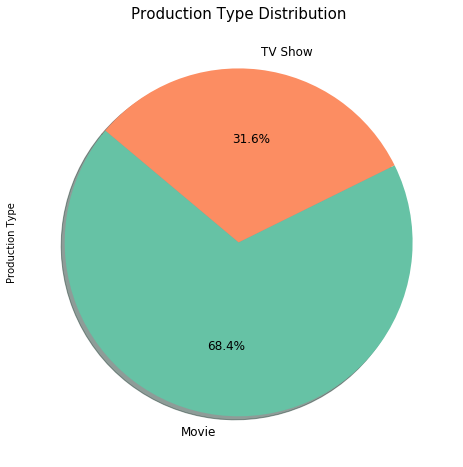

In [9]:
fig, ax = plt.subplots()

production_type_count.plot(kind='pie', y="type", colors=sns.color_palette("Set2"), autopct='%1.1f%%', figsize=(10,8),shadow=True, startangle=140, legend=False, fontsize=12, ax=ax)

ax.set_ylabel('Production Type')
ax.set_title("Production Type Distribution",fontsize=15)

plt.savefig("figures/TV_Movie_Pie.png")

In [10]:
netflix_df["year added"] = ""
netflix_df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China           2019-09-09   
1                            United Kingdom           2016-09-09   
2                             United States           2018-09-08   
3                             United States           2018-09-08   
4                             United States           2017-09-08   

   release_year    rating  duration                           listed_in  \
0          2019     TV-PG    90 min  Children & Family Movies, Comedies   
1          2016     TV-MA    94 min                     Stand-Up Comedy   
2          2013  TV-Y7-FV  1 Season                            Kids' TV   
3          2016     TV-Y7  1 Season                            Kids' TV   
4          2017     TV-14    99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
2  With the help of three human allies, the Autob...   
3  When a prison ship crash unleashes hundreds of...   
4  When nerdy high schooler Dani finally attracts...   

        Genre Main Category Genre Sub Category year added  
0  Children & Family Movies           Comedies             
1           Stand-Up Comedy               None             
2                  Kids' TV               None             
3                  Kids' TV               None             
4                  Comedies               None

In [11]:
# slice year from date_added_corrected to pull just the year and add to "year added" column
netflix_df['date_added_corrected'] = pd.to_datetime(netflix_df['date_added_corrected'])
netflix_df['year added'] = netflix_df['date_added_corrected'].dt.year
netflix_df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China           2019-09-09   
1                            United Kingdom           2016-09-09   
2                             United States           2018-09-08   
3                             United States           2018-09-08   
4                             United States           2017-09-08   

   release_year    rating  duration                           listed_in  \
0          2019     TV-PG    90 min  Children & Family Movies, Comedies   
1          2016     TV-MA    94 min                     Stand-Up Comedy   
2          2013  TV-Y7-FV  1 Season                            Kids' TV   
3          2016     TV-Y7  1 Season                            Kids' TV   
4          2017     TV-14    99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
2  With the help of three human allies, the Autob...   
3  When a prison ship crash unleashes hundreds of...   
4  When nerdy high schooler Dani finally attracts...   

        Genre Main Category Genre Sub Category  year added  
0  Children & Family Movies           Comedies      2019.0  
1           Stand-Up Comedy               None      2016.0  
2                  Kids' TV               None      2018.0  
3                  Kids' TV               None      2018.0  
4                  Comedies               None      2017.0

In [12]:
type_years_df = netflix_df.groupby(['type','year added']).size().reset_index(name='count')
type_years_df['year added'] = type_years_df['year added'].astype('int64')
print(type_years_df)

       type  year added  count
0     Movie        2008      1
1     Movie        2009      2
2     Movie        2010      1
3     Movie        2011     13
4     Movie        2012      4
5     Movie        2013      6
6     Movie        2014     19
7     Movie        2015     58
8     Movie        2016    264
9     Movie        2017    913
10    Movie        2018   1290
11    Movie        2019   1546
12    Movie        2020    147
13  TV Show        2008      1
14  TV Show        2012      3
15  TV Show        2013      6
16  TV Show        2014      6
17  TV Show        2015     32
18  TV Show        2016    192
19  TV Show        2017    387
20  TV Show        2018    492
21  TV Show        2019    803
22  TV Show        2020     37


type         Movie  TV Show
year added                 
2008           1.0      1.0
2009           2.0      NaN
2010           1.0      NaN
2011          13.0      NaN
2012           4.0      3.0
2013           6.0      6.0
2014          19.0      6.0
2015          58.0     32.0
2016         264.0    192.0
2017         913.0    387.0
2018        1290.0    492.0
2019        1546.0    803.0
2020         147.0     37.0


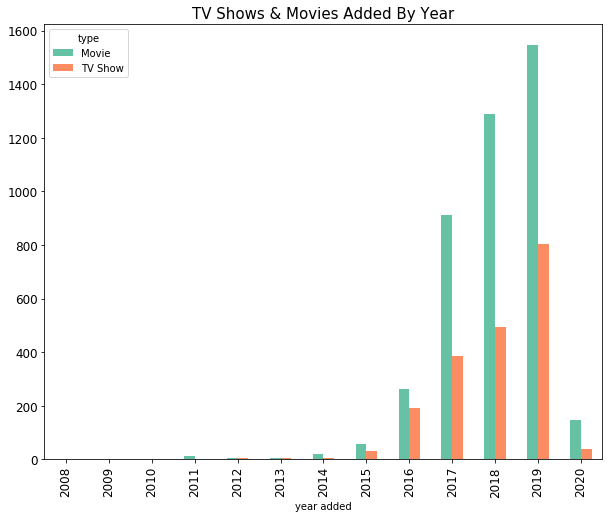

In [13]:
pivot_type_df = type_years_df.pivot(index='year added', columns='type', values='count')
print(pivot_type_df)
pivot_type_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"), figsize=(10,8),fontsize=12)
plt.title(label="TV Shows & Movies Added By Year",fontsize=15)
plt.savefig("figures/TV_Movie_AddYear.png")
plt.show()

In [14]:
# create bar chart showing genre Main Category content added over the years - Overall
genre_main = netflix_df.groupby("Genre Main Category")
genre_main_count = pd.DataFrame(genre_main["Genre Main Category"].count())
genre_main_count

Genre Main Category
Genre Main Category                              
Action & Adventure                            597
Anime Features                                 12
Anime Series                                  117
British TV Shows                              210
Children & Family Movies                      358
Classic & Cult TV                              19
Classic Movies                                 62
Comedies                                      803
Crime TV Shows                                309
Cult Movies                                    10
Documentaries                                 644
Docuseries                                    148
Dramas                                       1077
Horror Movies                                 205
Independent Movies                             18
International Movies                           85
International TV Shows                        570
Kids' TV                                      288
Movies                                         56
Music & Musicals                               12
Reality TV                                     63
Romantic Movies                                 2
Romantic TV Shows                              21
Sci-Fi & Fantasy                               10
Spanish-Language TV Shows                       1
Sports Movies                                   1
Stand-Up Comedy                               273
Stand-Up Comedy & Talk Shows                   28
TV Action & Adventure                          30
TV Comedies                                    89
TV Dramas                                      56
TV Horror                                       9
TV Sci-Fi & Fantasy                             1
TV Shows                                       10
Thrillers                                      40

In [15]:
# create a dataframe for Genre, Type and Count
genre1_df = netflix_df[["Genre Main Category","type"]]
genre2_df = genre1_df.groupby(['Genre Main Category','type']).size().reset_index(name='count')
# drop "Movies" & "TV Shows row"
genre2_df_corrected = genre2_df.drop([18,33],axis=0)
genre2_df_corrected

Genre Main Category     type  count
0             Action & Adventure    Movie    597
1                 Anime Features    Movie     12
2                   Anime Series  TV Show    117
3               British TV Shows  TV Show    210
4       Children & Family Movies    Movie    358
5              Classic & Cult TV  TV Show     19
6                 Classic Movies    Movie     62
7                       Comedies    Movie    803
8                 Crime TV Shows  TV Show    309
9                    Cult Movies    Movie     10
10                 Documentaries    Movie    644
11                    Docuseries  TV Show    148
12                        Dramas    Movie   1077
13                 Horror Movies    Movie    205
14            Independent Movies    Movie     18
15          International Movies    Movie     85
16        International TV Shows  TV Show    570
17                      Kids' TV  TV Show    288
19              Music & Musicals    Movie     12
20                    Reality TV  TV Show     63
21               Romantic Movies    Movie      2
22             Romantic TV Shows  TV Show     21
23              Sci-Fi & Fantasy    Movie     10
24     Spanish-Language TV Shows  TV Show      1
25                 Sports Movies    Movie      1
26               Stand-Up Comedy    Movie    273
27  Stand-Up Comedy & Talk Shows  TV Show     28
28         TV Action & Adventure  TV Show     30
29                   TV Comedies  TV Show     89
30                     TV Dramas  TV Show     56
31                     TV Horror  TV Show      9
32           TV Sci-Fi & Fantasy  TV Show      1
34                     Thrillers    Movie     40

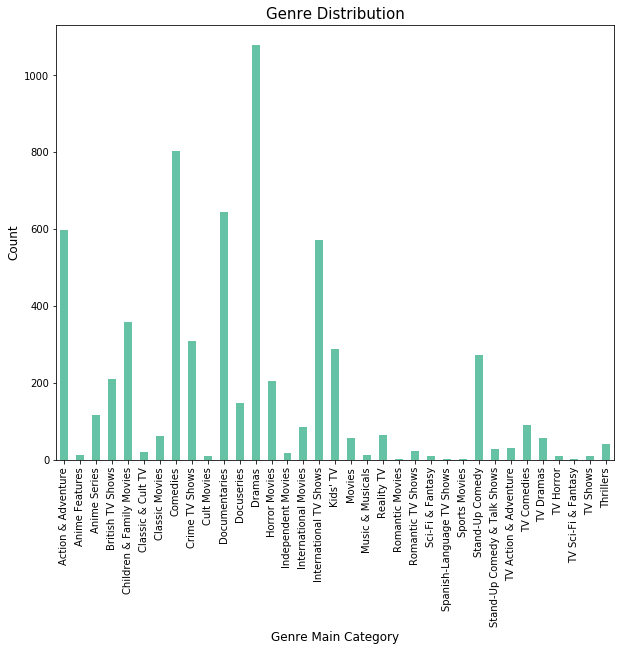

In [16]:
# plot Genre distribution over the years
fig, ax = plt.subplots()
genre_main_count.plot(kind='bar', color=sns.color_palette("Set2"),legend=False, figsize=(10,8), ax=ax)
ax.set_xlabel("Genre Main Category", fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Genre Distribution",fontsize=15)
plt.savefig("figures/GenreDist_Bar.png")

In [17]:
# separate genres by Movie
movie_genre = genre2_df_corrected[(genre2_df['type'] == "Movie")]
movie_genre

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Genre Main Category   type  count
0         Action & Adventure  Movie    597
1             Anime Features  Movie     12
4   Children & Family Movies  Movie    358
6             Classic Movies  Movie     62
7                   Comedies  Movie    803
9                Cult Movies  Movie     10
10             Documentaries  Movie    644
12                    Dramas  Movie   1077
13             Horror Movies  Movie    205
14        Independent Movies  Movie     18
15      International Movies  Movie     85
19          Music & Musicals  Movie     12
21           Romantic Movies  Movie      2
23          Sci-Fi & Fantasy  Movie     10
25             Sports Movies  Movie      1
26           Stand-Up Comedy  Movie    273
34                 Thrillers  Movie     40

In [18]:
# separate genres by TV Show
tvshows_genre = genre2_df_corrected[(genre2_df['type'] == "TV Show")]
tvshows_genre

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Genre Main Category     type  count
2                   Anime Series  TV Show    117
3               British TV Shows  TV Show    210
5              Classic & Cult TV  TV Show     19
8                 Crime TV Shows  TV Show    309
11                    Docuseries  TV Show    148
16        International TV Shows  TV Show    570
17                      Kids' TV  TV Show    288
20                    Reality TV  TV Show     63
22             Romantic TV Shows  TV Show     21
24     Spanish-Language TV Shows  TV Show      1
27  Stand-Up Comedy & Talk Shows  TV Show     28
28         TV Action & Adventure  TV Show     30
29                   TV Comedies  TV Show     89
30                     TV Dramas  TV Show     56
31                     TV Horror  TV Show      9
32           TV Sci-Fi & Fantasy  TV Show      1

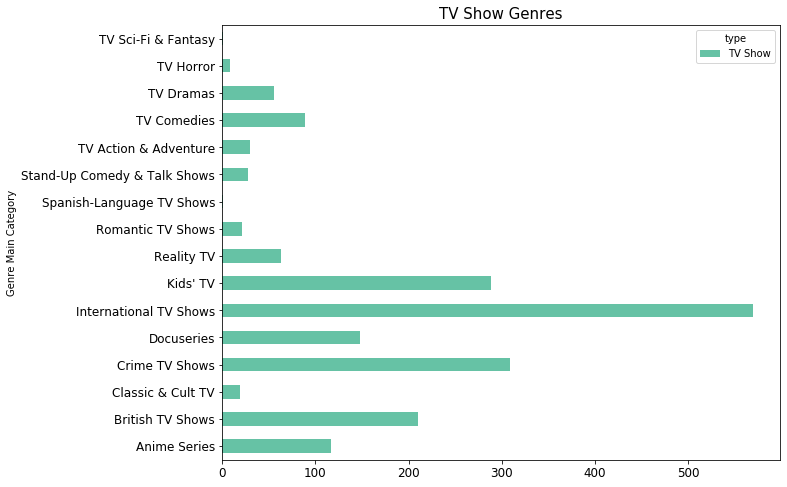

In [19]:
# plot Genres by TV Show
pivotgenres_df = tvshows_genre.pivot(index='Genre Main Category', columns='type', values='count')
pivotgenres_df.loc[:,['TV Show']].plot.barh(color=sns.color_palette("Set2"), figsize=(10,8), fontsize=12)
plt.title("TV Show Genres",fontsize=15)
plt.savefig("figures/TV_Show_Genres.png")
plt.show()

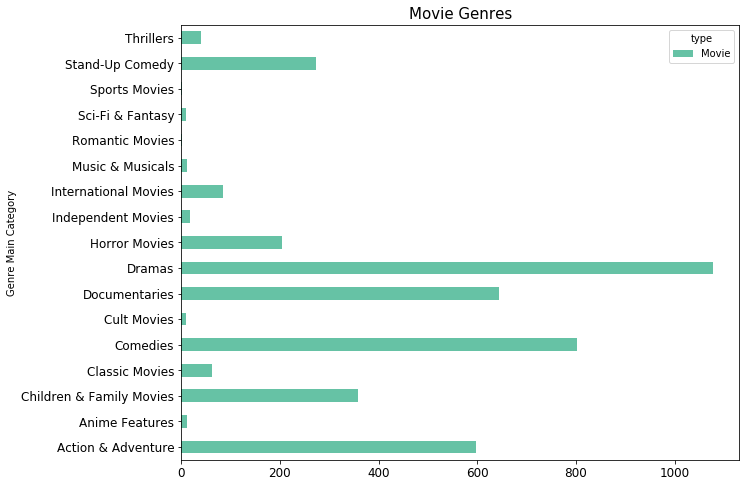

In [20]:
# plot Genres by Movie
pivotgenres_df = movie_genre.pivot(index='Genre Main Category', columns='type', values='count')
pivotgenres_df.loc[:,['Movie']].plot.barh(color=sns.color_palette("Set2"), figsize=(10,8), fontsize=12)
plt.title("Movie Genres", fontsize=15)
plt.savefig("figures/Movie_Genres.png")
plt.show()

In [21]:
# create bar chart showing number of movies & tv shows added over the years - (each year)
genre_years_df = netflix_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count')
genre_years_df['year added'] = genre_years_df['year added'].astype('int64')
# print(genre_years_df)
genre_years_df

Genre Main Category  year added  count
0    Action & Adventure        2014      1
1    Action & Adventure        2015      2
2    Action & Adventure        2016     20
3    Action & Adventure        2017    116
4    Action & Adventure        2018    185
..                  ...         ...    ...
185           Thrillers        2016      1
186           Thrillers        2017      5
187           Thrillers        2018      9
188           Thrillers        2019     23
189           Thrillers        2020      2

[190 rows x 3 columns]

In [22]:
# Shows top 10 Genres in total
genre_main = netflix_df.groupby("Genre Main Category")

genre_top10_count = pd.DataFrame(genre_main["Genre Main Category"].count().nlargest(10).reset_index(name='top10'))
genre_top10_count

Genre Main Category  top10
0                    Dramas   1077
1                  Comedies    803
2             Documentaries    644
3        Action & Adventure    597
4    International TV Shows    570
5  Children & Family Movies    358
6            Crime TV Shows    309
7                  Kids' TV    288
8           Stand-Up Comedy    273
9          British TV Shows    210

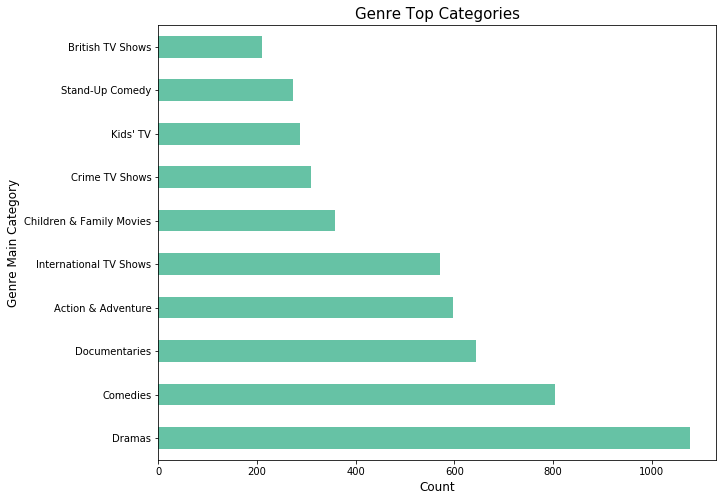

In [23]:
# genre_top_count (sort values by column want to sort by)
fig, ax = plt.subplots()
genre_top10_count.plot(kind='barh', color=sns.color_palette("Set2"),legend=False, figsize=(10,8), ax=ax)
ax.set_yticklabels(genre_top10_count["Genre Main Category"])
ax.set_xlabel("Count",fontsize=12)
ax.set_ylabel("Genre Main Category",fontsize=12)
ax.set_title("Genre Top Categories",fontsize=15)
plt.savefig("figures/TopGenres_Bar.png")

In [24]:
# Shows top 10 Genres added in 2018
year2018_df = netflix_df[(netflix_df['year added'] == 2018)]
genre_main2018 = year2018_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
genre_main2018.head(10)

Genre Main Category  year added  count
12                    Dramas      2018.0    367
7                   Comedies      2018.0    250
0         Action & Adventure      2018.0    185
10             Documentaries      2018.0    169
16    International TV Shows      2018.0    126
8             Crime TV Shows      2018.0     90
25           Stand-Up Comedy      2018.0     86
4   Children & Family Movies      2018.0     81
17                  Kids' TV      2018.0     70
13             Horror Movies      2018.0     64

In [25]:
# Shows top 10 Genres added in 2019
year2019_df = netflix_df[(netflix_df['year added'] == 2019)]
genre_main2019 = year2019_df.groupby(['Genre Main Category','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
genre_main2019.head(10)

Genre Main Category  year added  count
12                    Dramas      2019.0    386
7                   Comedies      2019.0    316
0         Action & Adventure      2019.0    239
16    International TV Shows      2019.0    228
10             Documentaries      2019.0    189
4   Children & Family Movies      2019.0    140
8             Crime TV Shows      2019.0    132
17                  Kids' TV      2019.0    104
13             Horror Movies      2019.0     90
3           British TV Shows      2019.0     75

In [26]:
# Ratings data
ratings_count = netflix_df.groupby("rating")

ratings_count_df = pd.DataFrame(ratings_count["rating"].count())
ratings_count_df

rating
rating          
G             37
NC-17          2
NR           218
PG           184
PG-13        286
R            508
TV-14       1698
TV-G         149
TV-MA       2027
TV-PG        701
TV-Y         143
TV-Y7        169
TV-Y7-FV      95
UR             7

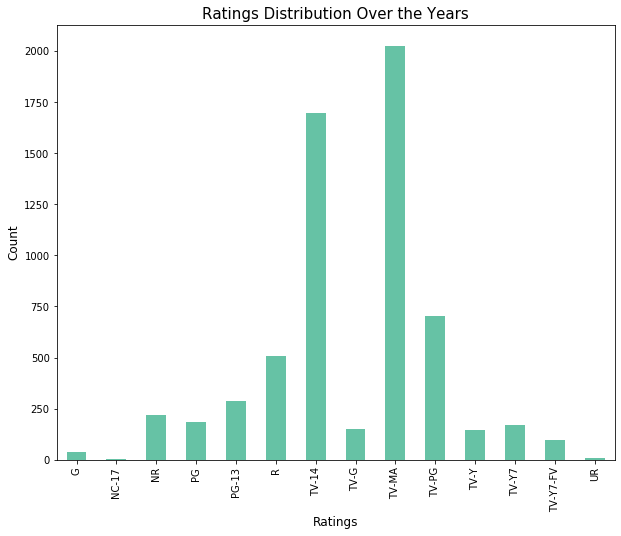

In [27]:
# create bar chart showing Ratings content added over the years - Overall
fig, ax = plt.subplots()
ratings_count_df.plot(kind='bar', color=sns.color_palette("Set2"),figsize=(10,8),legend=False, ax=ax)
ax.set_xlabel("Ratings",fontsize=12)
ax.set_ylabel("Count",fontsize=12)
ax.set_title("Ratings Distribution Over the Years",fontsize=15)
plt.savefig("figures/RatingsDist_Bar.png")

      rating     type  count
0          G    Movie     36
1          G  TV Show      1
2      NC-17    Movie      2
3         NR    Movie    202
4         NR  TV Show     16
5         PG    Movie    183
6         PG  TV Show      1
7      PG-13    Movie    286
8          R    Movie    506
9          R  TV Show      2
10     TV-14    Movie   1038
11     TV-14  TV Show    660
12      TV-G    Movie     80
13      TV-G  TV Show     69
14     TV-MA    Movie   1348
15     TV-MA  TV Show    679
16     TV-PG    Movie    432
17     TV-PG  TV Show    269
18      TV-Y    Movie     41
19      TV-Y  TV Show    102
20     TV-Y7    Movie     69
21     TV-Y7  TV Show    100
22  TV-Y7-FV    Movie     27
23  TV-Y7-FV  TV Show     68
24        UR    Movie      7
type       Movie  TV Show
rating                   
G           36.0      1.0
NC-17        2.0      NaN
NR         202.0     16.0
PG         183.0      1.0
PG-13      286.0      NaN
R          506.0      2.0
TV-14     1038.0    660.0
TV-G        

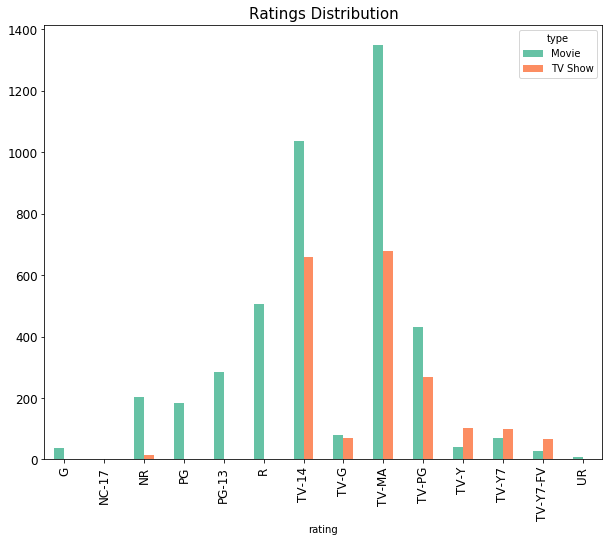

In [28]:
ratings_type_df = netflix_df.groupby(['rating','type']).size().reset_index(name='count')
print(ratings_type_df)

ratings_type_df = ratings_type_df.dropna()

pivotratings_df = ratings_type_df.pivot(index='rating', columns='type', values='count')
print(pivotratings_df)
pivotratings_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"), figsize=(10,8),fontsize=12)
plt.title("Ratings Distribution",fontsize=15)
plt.savefig("figures/Ratings_Distribution.png")
plt.show()

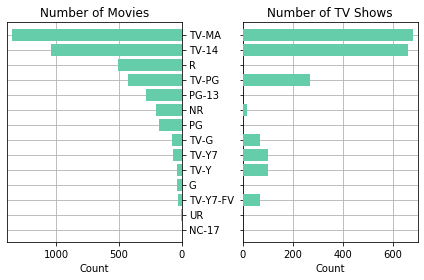

In [29]:
# List comphrensions, then turn into arrays
ratings = ratings_type_df['rating'].unique()

Movies = [ratings_type_df[(ratings_type_df['rating'] == rating) & (ratings_type_df['type'] == "Movie")]['count'].values[0] for rating in ratings]
Movies = np.array(Movies)

TV_Shows = []
for rating in ratings:
    count = ratings_type_df[(ratings_type_df['rating'] == rating) & (ratings_type_df['type'] == "TV Show")]['count'].values
    if len(count)==0:
        TV_Shows.append(0)
    else: 
        TV_Shows.append(count[0])
TV_Shows = np.array(TV_Shows)


# Sort by number of Movies & TV Shows
idx = Movies.argsort()
ratings, Movies, TV_Shows = [np.take(x, idx) for x in [ratings, Movies, TV_Shows]]

y = np.arange(TV_Shows.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, Movies, align='center', color="MediumAquaMarine", zorder=10)
axes[0].set(title='Number of Movies')
axes[1].barh(y, TV_Shows, align='center', color="MediumAquaMarine", zorder=10)
axes[1].set(title='Number of TV Shows')
axes[0].set_xlabel("Count")
axes[0].set_xlim
axes[1].set_xlabel("Count")

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=ratings)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.35)

plt.savefig("figures/Ratings_Count_TornadoPlot.png")
plt.show()

In [30]:
ratings = ratings_type_df['rating'].unique()
ratings

array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

In [31]:
Movies = [ratings_type_df[(ratings_type_df['rating'] == rating) & (ratings_type_df['type'] == "Movie")]['count'].values[0] for rating in ratings]
Movies

[36, 2, 202, 183, 286, 506, 1038, 80, 1348, 432, 41, 69, 27, 7]

In [32]:
ratings_type_df

rating     type  count
0          G    Movie     36
1          G  TV Show      1
2      NC-17    Movie      2
3         NR    Movie    202
4         NR  TV Show     16
5         PG    Movie    183
6         PG  TV Show      1
7      PG-13    Movie    286
8          R    Movie    506
9          R  TV Show      2
10     TV-14    Movie   1038
11     TV-14  TV Show    660
12      TV-G    Movie     80
13      TV-G  TV Show     69
14     TV-MA    Movie   1348
15     TV-MA  TV Show    679
16     TV-PG    Movie    432
17     TV-PG  TV Show    269
18      TV-Y    Movie     41
19      TV-Y  TV Show    102
20     TV-Y7    Movie     69
21     TV-Y7  TV Show    100
22  TV-Y7-FV    Movie     27
23  TV-Y7-FV  TV Show     68
24        UR    Movie      7

In [33]:
TV_Shows = []
for rating in ratings:
    count = ratings_type_df[(ratings_type_df['rating'] == rating) & (ratings_type_df['type'] == "TV Show")]['count'].values
    if len(count)==0:
        TV_Shows.append(0)
    else: 
        TV_Shows.append(count[0])
TV_Shows

[1, 0, 16, 1, 0, 2, 660, 69, 679, 269, 102, 100, 68, 0]

In [34]:
ratings_df = netflix_df.groupby(['rating','year added']).size().reset_index(name='count')
ratings_df['year added'] = ratings_df['year added'].astype('int64')
print(ratings_df)

       rating  year added  count
0           G        2014      1
1           G        2015      1
2           G        2016      2
3           G        2017      4
4           G        2018     15
..        ...         ...    ...
96   TV-Y7-FV        2019     27
97   TV-Y7-FV        2020      1
98         UR        2016      1
99         UR        2017      2
100        UR        2019      4

[101 rows x 3 columns]


In [35]:
# Shows top 5 Ratings in total
ratings_top = netflix_df.groupby("rating")

rating_top_count = pd.DataFrame(ratings_top["rating"].count().nlargest(5).reset_index(name='top5'))
rating_top_count

rating  top5
0  TV-MA  2027
1  TV-14  1698
2  TV-PG   701
3      R   508
4  PG-13   286

In [36]:
# Shows top 5 Ratings added in 2018
year2018_ratings_df = netflix_df[(netflix_df['year added'] == 2018)]
ratings_2018 = year2018_ratings_df.groupby(['rating','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
ratings_2018.head(5)

rating  year added  count
7  TV-MA      2018.0    653
5  TV-14      2018.0    499
8  TV-PG      2018.0    213
4      R      2018.0    131
3  PG-13      2018.0     56

In [37]:
# Set x axis and tick locations
x_axis = np.arange(len(ratings_2018))
tick_locations = [value for value in x_axis]

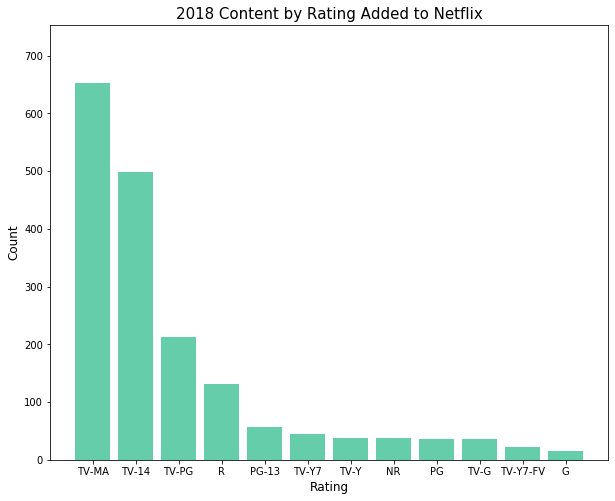

In [38]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,8))
plt.bar(x_axis, ratings_2018["count"], facecolor='MediumAquaMarine', align="center")
plt.xticks(tick_locations, ratings_2018["rating"])

plt.ylim(0, max(ratings_2018["count"])+100)

# Set a Title and labels
plt.title("2018 Content by Rating Added to Netflix",fontsize=15)
plt.xlabel("Rating",fontsize=12)
plt.ylabel("Count",fontsize=12)

plt.savefig("figures/Ratings_2018.png")

In [39]:
# Ratings added in 2019
year2019_ratings_df = netflix_df[(netflix_df['year added'] == 2019)]
ratings_2019 = year2019_ratings_df.groupby(['rating','year added']).size().reset_index(name='count').sort_values("count", ascending=False)
ratings_2019.head(5)

rating  year added  count
8  TV-MA      2019.0    765
6  TV-14      2019.0    655
5      R      2019.0    240
9  TV-PG      2019.0    219
4  PG-13      2019.0    153

In [40]:
# Set x axis and tick locations
x_axis = np.arange(len(ratings_2019))
tick_locations = [value for value in x_axis]

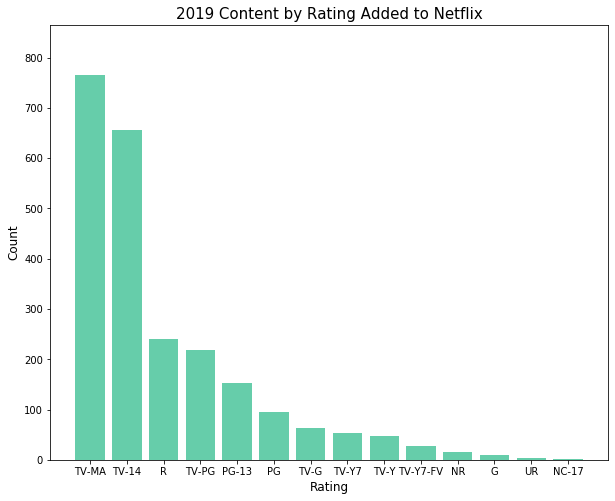

In [41]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,8))
plt.bar(x_axis, ratings_2019["count"], facecolor='MediumAquaMarine', align="center")
plt.xticks(tick_locations, ratings_2019["rating"])

plt.ylim(0, max(ratings_2019["count"])+100)

# Set a Title and labels
plt.title("2019 Content by Rating Added to Netflix",fontsize=15)
plt.xlabel("Rating",fontsize=12)
plt.ylabel("Count",fontsize=12)

plt.savefig("figures/Ratings_2019.png")

# Analysis by Zen

In [42]:
# Filter the data so that only those sightings in the movies are in a DataFrame
movie_based_df = netflix_df.loc[netflix_df["type"] == "Movie"]
movie_based_df.head(3)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China           2019-09-09   
1                            United Kingdom           2016-09-09   
4                             United States           2017-09-08   

   release_year rating duration                           listed_in  \
0          2019  TV-PG   90 min  Children & Family Movies, Comedies   
1          2016  TV-MA   94 min                     Stand-Up Comedy   
4          2017  TV-14   99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
4  When nerdy high schooler Dani finally attracts...   

        Genre Main Category Genre Sub Category  year added  
0  Children & Family Movies           Comedies      2019.0  
1           Stand-Up Comedy               None      2016.0  
4                  Comedies               None      2017.0

In [43]:
# Check data types of columns
netflix_df.dtypes

show_id                          int64
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added_corrected    datetime64[ns]
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
Genre Main Category             object
Genre Sub Category              object
year added                     float64
dtype: object

In [44]:
# New dataframe with split value columns to change column type
file_min = movie_based_df["duration"].str.split(" ", n = 1, expand = True)
movie_based_df["duration (min)"]= file_min[0]
movie_based_df["min"]= file_min[1]

# Remove unnecessary column
del movie_based_df["min"]

movie_based_df.head(3)

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added_corrected  \
0  United States, India, South Korea, China           2019-09-09   
1                            United Kingdom           2016-09-09   
4                             United States           2017-09-08   

   release_year rating duration                           listed_in  \
0          2019  TV-PG   90 min  Children & Family Movies, Comedies   
1          2016  TV-MA   94 min                     Stand-Up Comedy   
4          2017  TV-14   99 min                            Comedies   

                                         description  \
0  Before planning an awesome wedding for his gra...   
1  Jandino Asporaat riffs on the challenges of ra...   
4  When nerdy high schooler Dani finally attracts...   

        Genre Main Category Genre Sub Category  year added duration (min)  
0  Children & Family Movies           Comedies      2019.0             90  
1           Stand-Up Comedy               None      2016.0             94  
4                  Comedies               None      2017.0             99

In [45]:
# Change column type from object to int64
movie_based_df['duration (min)'] = pd.to_numeric(movie_based_df['duration (min)'])

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
# Check data type of the column
movie_based_df.dtypes

show_id                          int64
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added_corrected    datetime64[ns]
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
Genre Main Category             object
Genre Sub Category              object
year added                     float64
duration (min)                   int64
dtype: object

In [47]:
# Create a new dataframe to show avg durations by years.
year_based_df = movie_based_df.groupby(["release_year"])
duration_based_df= pd.DataFrame(year_based_df["duration (min)"].mean().reset_index(name="duration (min)"))
duration_based_df.head()

release_year  duration (min)
0          1942       35.000000
1          1943       62.666667
2          1944       52.000000
3          1945       51.333333
4          1946       76.000000

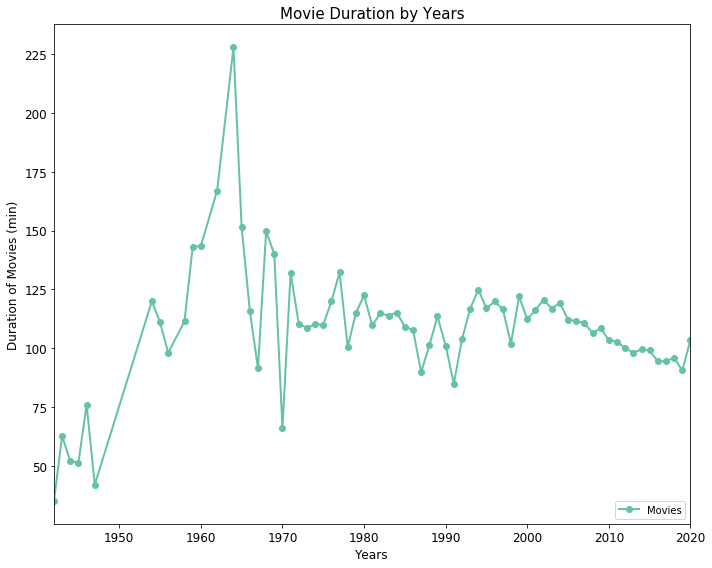

In [48]:
# Plot the 'years/durations' line chart.
fig, ax = plt.subplots()
duration_based_df.plot(x="release_year", y="duration (min)", ax=ax, figsize=(10,8),marker="o",color=sns.color_palette("Set2"), linewidth=2, label="Movies",fontsize=12)
plt.legend(loc="lower right")

plt.xlabel("Years",fontsize=12)
plt.ylabel("Duration of Movies (min)",fontsize=12)
plt.title("Movie Duration by Years",fontsize=15)

plt.tight_layout()

plt.savefig("figures/Z_movie_duration_byYears.png")
plt.show()

In [49]:
# Create a new dataframe to show top 10 numbers of movie genres
category_based_df = movie_based_df.groupby(["Genre Main Category"])
top_10_df=pd.DataFrame(category_based_df["Genre Main Category"].count().nlargest(10).reset_index(name="Count"))
top_10_df.head(10)

Genre Main Category  Count
0                    Dramas   1077
1                  Comedies    803
2             Documentaries    644
3        Action & Adventure    597
4  Children & Family Movies    358
5           Stand-Up Comedy    273
6             Horror Movies    205
7      International Movies     85
8            Classic Movies     62
9                    Movies     56

In [50]:
# Rename a row
top_10_df.loc[9,"Genre Main Category"]="Uncategorized Movies"
top_10_df

Genre Main Category  Count
0                    Dramas   1077
1                  Comedies    803
2             Documentaries    644
3        Action & Adventure    597
4  Children & Family Movies    358
5           Stand-Up Comedy    273
6             Horror Movies    205
7      International Movies     85
8            Classic Movies     62
9      Uncategorized Movies     56

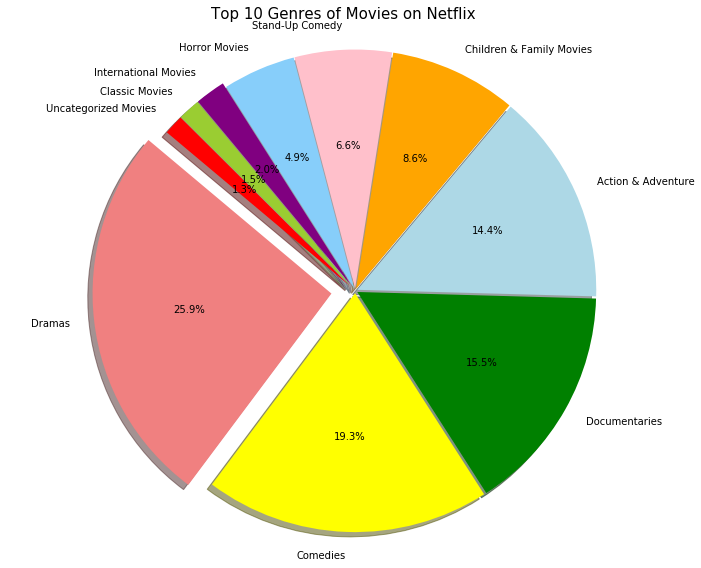

In [51]:
# Plot pie chart to show top 10 genres of movies
labels = top_10_df["Genre Main Category"]
sizes = top_10_df["Count"]
colors=["lightcoral","yellow","green","lightblue","orange","pink","lightskyblue","purple","yellowgreen","red"]
explode = (0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.03,0.03)

plt.figure(figsize=(10,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Top 10 Genres of Movies on Netflix', fontsize=15)
plt.axis('equal')
plt.tight_layout()

plt.savefig("figures/Z_Top_10_Genres_of_Movies.png")
plt.show()

In [52]:
# Create a new dataframe to show top numbers of tv show genres
show_based_df = netflix_df.loc[netflix_df["type"] == "TV Show"]
category_based_df = show_based_df.groupby(["Genre Main Category"])
# Create a new dataframe to show top numbers of tv show genres
top_10_show_df=pd.DataFrame(category_based_df["Genre Main Category"].count().nlargest(10).reset_index(name="Count"))

top_10_show_df

Genre Main Category  Count
0  International TV Shows    570
1          Crime TV Shows    309
2                Kids' TV    288
3        British TV Shows    210
4              Docuseries    148
5            Anime Series    117
6             TV Comedies     89
7              Reality TV     63
8               TV Dramas     56
9   TV Action & Adventure     30

In [53]:
# Rename a row name
top_10_show_df.loc[7,"Genre Main Category"]="Uncategorized TV Shows"
top_10_show_df  

Genre Main Category  Count
0  International TV Shows    570
1          Crime TV Shows    309
2                Kids' TV    288
3        British TV Shows    210
4              Docuseries    148
5            Anime Series    117
6             TV Comedies     89
7  Uncategorized TV Shows     63
8               TV Dramas     56
9   TV Action & Adventure     30

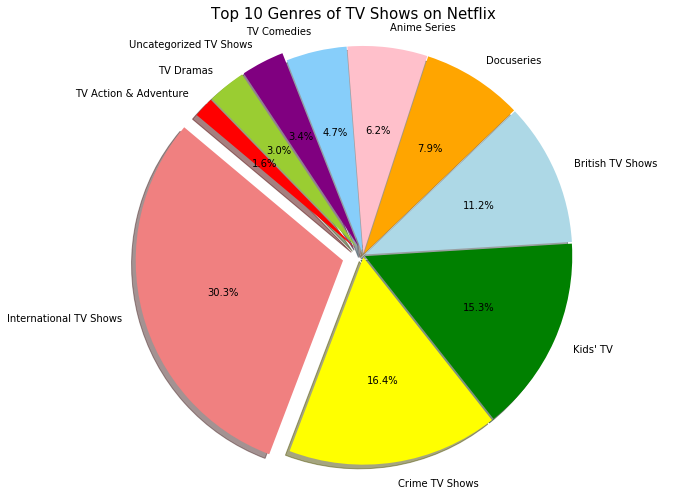

In [54]:
# Plot pie chart to show top 10 genres of tv shows
labels = top_10_show_df["Genre Main Category"]
sizes = top_10_show_df["Count"]
colors=["lightcoral","yellow","green","lightblue","orange","pink","lightskyblue","purple","yellowgreen","red"]
explode = (0.1,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.05,0.05)

plt.figure(figsize=(10,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Top 10 Genres of TV Shows on Netflix',fontsize=15)
plt.axis('equal')
plt.tight_layout()
plt.savefig("figures/Z_Top_10_Genres_of_TvShows.png")
plt.show()

In [55]:
# Create a new dataframe to show avg durations of movie genres
category_based_df = movie_based_df.groupby(["Genre Main Category"])
genre_duration_df=pd.DataFrame(category_based_df["duration (min)"].mean().reset_index(name="duration (min)"))
genre_duration_df.head()

Genre Main Category  duration (min)
0        Action & Adventure      113.984925
1            Anime Features       92.166667
2  Children & Family Movies       79.790503
3            Classic Movies      109.887097
4                  Comedies      106.098381

In [56]:
# Delete the meaningless data
genre_duration_corrected_df=genre_duration_df.drop([11],axis=0)

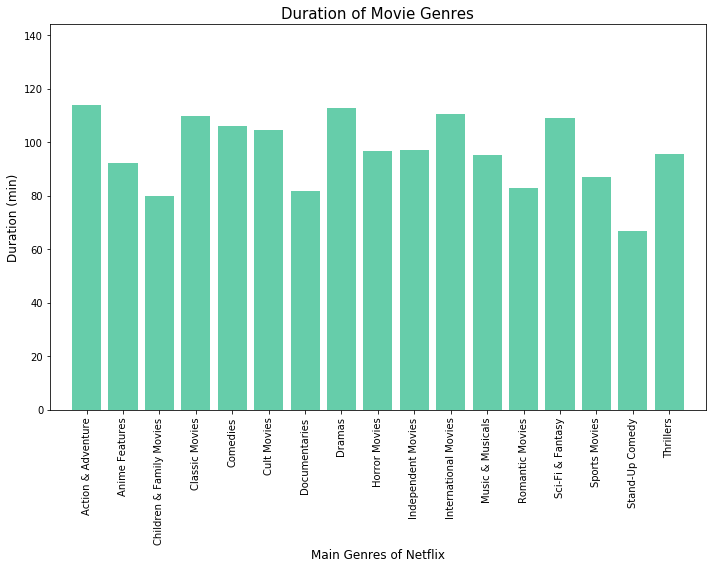

In [57]:
# Plot a bar chart avg durations of movie genres

x_axis = np.arange(len(genre_duration_corrected_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,8))

plt.bar( x_axis, genre_duration_corrected_df["duration (min)"], facecolor='MediumAquaMarine', align="center")

plt.xticks(tick_locations, genre_duration_corrected_df["Genre Main Category"], rotation="vertical")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(genre_duration_corrected_df["duration (min)"])+30)

plt.xlabel("Main Genres of Netflix", fontsize=12)
plt.ylabel("Duration (min)",fontsize=12)
plt.title('Duration of Movie Genres', fontsize=15)

plt.tight_layout()

plt.savefig("figures/Z_Durations_of_Movie_Genres.png")
plt.show()

# Analysis by Harini 

In [58]:
import dtale

# Explore the entire dataframe 
flix_df = dtale.show(netflix_df,ignore_duplicate=True)
flix_df

    year added  count
0         2008      2
1         2009      2
2         2010      1
3         2011     13
4         2012      7
5         2013     12
6         2014     25
7         2015     90
8         2016    456
9         2017   1300
10        2018   1782
11        2019   2349


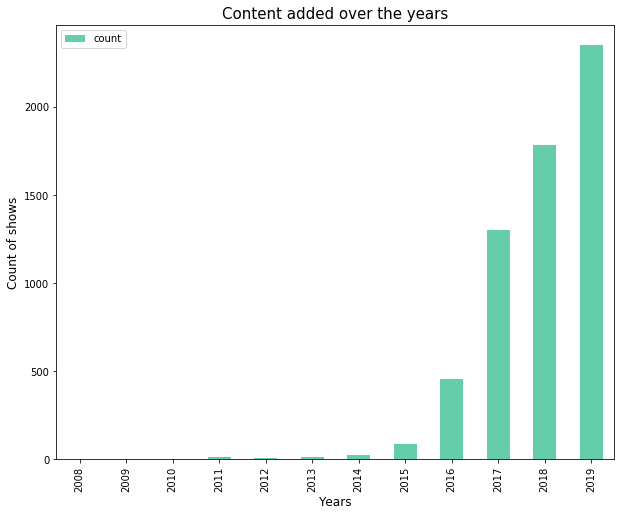

In [59]:
# Determine the number of total shows added over years
show_years_df = netflix_df.groupby('year added')['show_id'].size().reset_index(name='count')
show_years_df['year added'] = show_years_df['year added'].astype('int64')
# Drop the data for current year as the data is not yet complete
show_years_df.drop(show_years_df[show_years_df['year added'] == 2020].index, inplace = True)
print(show_years_df)
show_years_df.plot('year added', 'count', kind='bar', facecolor='MediumAquaMarine',figsize=(10,8))
plt.ylabel('Count of shows',fontsize=12)
plt.xlabel('Years',fontsize=12)
plt.title("Content added over the years",fontsize=15)
plt.savefig("figures/Shows_Years.png")
plt.show()

Netflix has seen a tremendous growth since its launch and the above plot summarizes the growth of its content over the years.  The number of titles added to the netflix content has increased each year indicating an increase in the popularity of Netflix.

In [60]:
# User-defined function to parse countries column
def parse_country(df,col1,col2):
    new_country = []
    new_country = (df[col2].astype(str)).str.split(', ').tolist()
    n_col1 = col1.replace('"', '')
    new_country_df = pd.DataFrame(new_country, index=df[col1]).stack()
    new_country_df = new_country_df.reset_index([0, n_col1])
    new_country_df.columns = [col1,col2]
    new_country_df = new_country_df[new_country_df[col2] != 'nan']
    cond_cntry = ['United States,', 'Poland,', 'United Kingdom,']
    new_country_df = new_country_df[~new_country_df.country.isin(cond_cntry)]
    return new_country_df

            country  count
103   United States   2609
38            India    838
102  United Kingdom    601
14           Canada    318
29           France    271
45            Japan    231
90            Spain    178
88      South Korea    162
31          Germany    151
58           Mexico    129
4         Australia    126
17            China    120
35        Hong Kong     97
98           Turkey     87
96           Taiwan     75


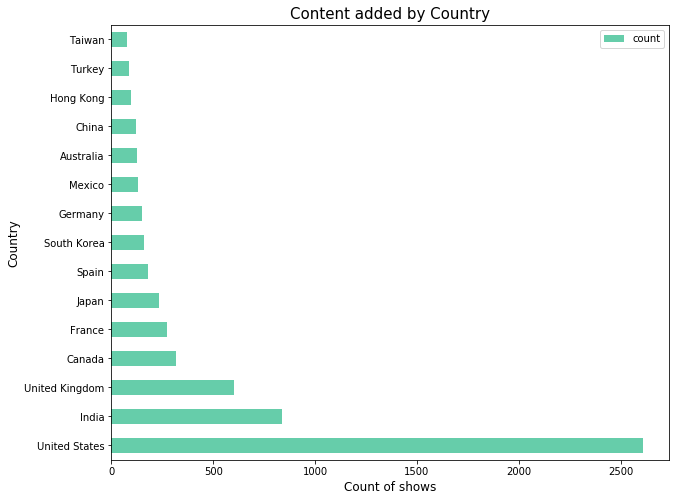

In [61]:
# Determine the top 15 countries to produce content
country_df = netflix_df.copy()
cntry_df = parse_country(country_df,'show_id','country')
#print(cntry_df)
cntry_df = cntry_df.groupby('country').size().reset_index(name='count')
#print(cntry_df)
cntry_df1 = cntry_df.sort_values('count', ascending=False).head(15)
print(cntry_df1)
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = 'sans-serif'
cntry_df1.plot('country', 'count', kind='barh', facecolor='MediumAquaMarine',figsize=(10,8))
plt.ylabel('Country',fontsize=12)
plt.xlabel('Count of shows',fontsize=12)
plt.title("Content added by Country",fontsize=15)
plt.savefig("figures/Shows_Countries.png")
plt.show()

In [62]:
# Plot the global distribution of content
import plotly.graph_objs as go
import folium

fig = go.Figure(data=go.Choropleth(
    locations = cntry_df['country'],
    z = cntry_df['count'],
    locationmode = 'country names',
    text = cntry_df['country'],
    colorscale="sunset",
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
))

fig.update_layout(
    title_text='Geographical distribution of content',
    geo=dict(
        showframe=True,
        showcoastlines=True,
        projection_type='equirectangular'
    )
)
plt.savefig("figures/Shows_Mapview.png")
fig.show()

<Figure size 1440x720 with 0 Axes>

United States looks to be the trail blazer in content production, with over 2600 total content titles followed closely by India( with 838 total titles) and the United Kingdom (with 601 total titles).

type                            Movie  TV Show
country                                       
Australia                         NaN     39.0
Canada                           88.0     53.0
Egypt                            42.0      NaN
France                           50.0     40.0
Hong Kong                        49.0      NaN
India                           724.0     53.0
Indonesia                        43.0      NaN
Japan                            47.0    129.0
Mexico                           54.0      NaN
Nigeria                          36.0      NaN
Philippines                      43.0      NaN
South Korea                       NaN    104.0
Spain                            80.0     37.0
Taiwan                            NaN     65.0
Turkey                           55.0      NaN
United Kingdom                  170.0    178.0
United Kingdom, United States    40.0      NaN
United States                  1482.0    550.0


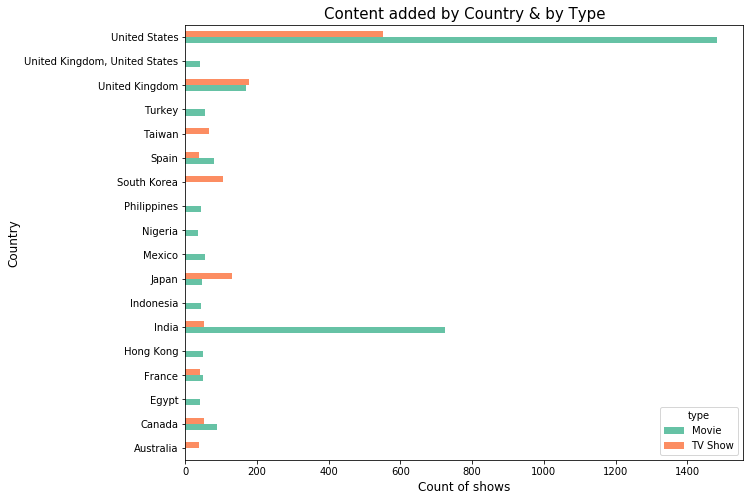

In [63]:
# Deteremine the top 25 countries to produce Netflix content
country_type_df = netflix_df.groupby(['country','type']).size().reset_index(name='count')
country_type_df = country_type_df.sort_values('count', ascending=False).head(25)
#print(country_type_df)
piv_cn_ty_df = country_type_df.pivot(index='country', columns='type', values='count')
print(piv_cn_ty_df)
piv_cn_ty_df.loc[:,['Movie','TV Show']].plot.barh(color=sns.color_palette("Set2", 10),figsize=(10,8))
plt.ylabel('Country',fontsize=12)
plt.xlabel('Count of shows',fontsize=12)
plt.title("Content added by Country & by Type",fontsize=15)
plt.savefig("figures/Shows_Country_Type.png")
plt.show()

The above conclusion of the US being the top content producer seems to hold true, even on breaking down the content into types, as movies and TV shows. 
However it is interesting to note that, among the top 3 content producing countries,  for United states and India, more movies seem to be added to Netflix than the TV shows, whereas for UK, roughly equal number of movies and TV shows have been added.

      type  count
0    Movie   4265
1  TV Show   1969


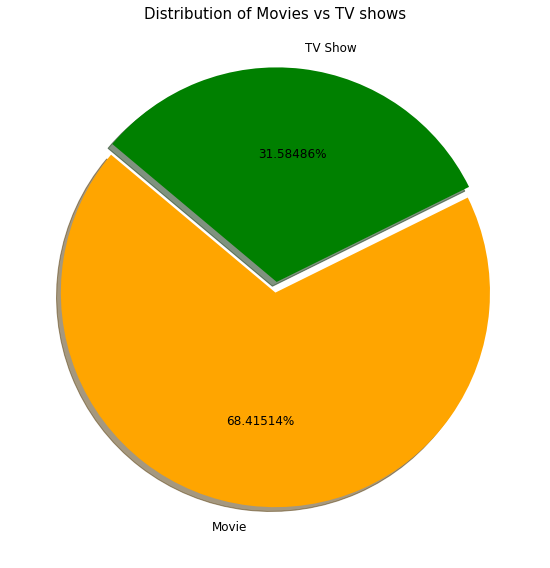

In [64]:
# Plot Netflix content distribution
type_df = netflix_df.groupby('type').size().reset_index(name='count')
print(type_df)
fig, ax = plt.subplots()
labels = type_df['type'].unique()
title = 'Distribution of Movies vs TV shows'
type_df.plot.pie(y="count", labels=labels, explode=[0,0.05],colors=['orange','green'], autopct="%0.5f%%", figsize=(10,8),shadow=True, startangle=140, ax=ax,legend=False, fontsize=12)
ax.set_ylabel("")
ax.set_title(title,fontsize=15)
fig.tight_layout()
plt.savefig("figures/Shows_Type_PiePlot.png")

Of all the available content on Netflix, two-thirds (or slightly above, around 68.4%) of it is movies and TV shows make up the remaining one-third (around 31.5%).

In [65]:
# Determine the count of type of content added over the years
type_years_df = netflix_df.groupby(['type','year added']).size().reset_index(name='count')
type_years_df['year added'] = type_years_df['year added'].astype('int64')
# Drop the data for current year as the data is not yet complete
type_years_df.drop(type_years_df[type_years_df['year added'] == 2020].index, inplace = True)
print(type_years_df)

       type  year added  count
0     Movie        2008      1
1     Movie        2009      2
2     Movie        2010      1
3     Movie        2011     13
4     Movie        2012      4
5     Movie        2013      6
6     Movie        2014     19
7     Movie        2015     58
8     Movie        2016    264
9     Movie        2017    913
10    Movie        2018   1290
11    Movie        2019   1546
13  TV Show        2008      1
14  TV Show        2012      3
15  TV Show        2013      6
16  TV Show        2014      6
17  TV Show        2015     32
18  TV Show        2016    192
19  TV Show        2017    387
20  TV Show        2018    492
21  TV Show        2019    803


type         Movie  TV Show
year added                 
2008           1.0      1.0
2009           2.0      NaN
2010           1.0      NaN
2011          13.0      NaN
2012           4.0      3.0
2013           6.0      6.0
2014          19.0      6.0
2015          58.0     32.0
2016         264.0    192.0
2017         913.0    387.0
2018        1290.0    492.0
2019        1546.0    803.0


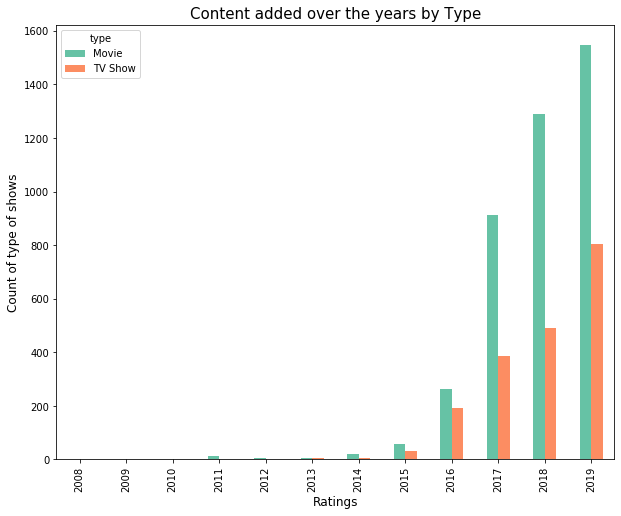

<Figure size 1440x720 with 0 Axes>

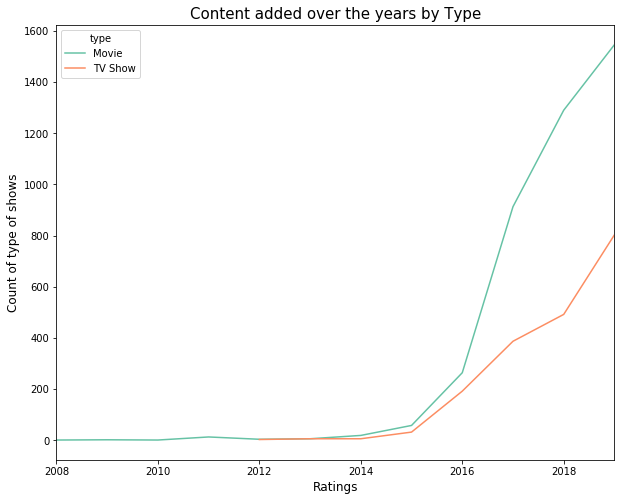

In [66]:
pivot_df = type_years_df.pivot(index='year added', columns='type', values='count')
print(pivot_df)
pivot_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"),figsize=(10,8))
plt.title('Content added over the years by Type',fontsize=15)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Count of type of shows',fontsize=12)
plt.show()
plt.savefig("figures/Shows_Years_Type1.png")
pivot_df.loc[:,['Movie','TV Show']].plot.line(color=sns.color_palette("Set2"),figsize=(10,8))
plt.title('Content added over the years by Type',fontsize=15)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Count of type of shows',fontsize=12)
plt.savefig("figures/Shows_Years_Type2.png")
plt.show()

2020-03-24 16:53:58,009 - INFO     - NumExpr defaulting to 4 threads.


type        Movie  TV Show     %Movie   %TV Show
year added                                      
2008            1        1   0.024384   0.052029
2012            4        3   0.097537   0.156087
2013            6        6   0.146306   0.312175
2014           19        6   0.463302   0.312175
2015           58       32   1.414289   1.664932
2016          264      192   6.437454   9.989594
2017          913      387  22.262863  20.135276
2018         1290      492  31.455743  25.598335
2019         1546      803  37.698122  41.779396


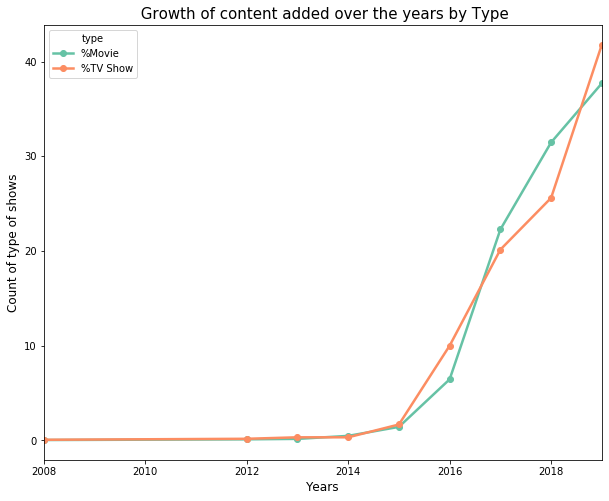

In [67]:
# Determine the growth of type of content over the years
# dropping null value columns to avoid errors
pivot_df.dropna(inplace = True) 
pivot_df['Movie'] = pivot_df['Movie'].astype('int64')
pivot_df['TV Show'] = pivot_df['TV Show'].astype('int64')
pivot_df['%Movie'] = 100 * (pivot_df['Movie']/pivot_df['Movie'].sum())
pivot_df['%TV Show'] = 100 * (pivot_df['TV Show']/pivot_df['TV Show'].sum())
print(pivot_df)
pivot_df.loc[:,['%Movie','%TV Show']].plot.line(color=sns.color_palette("Set2"),marker='o', figsize=(10,8), linewidth=2.5)
plt.title(' Growth of content added over the years by Type',fontsize=15)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Count of type of shows',fontsize=12)
plt.savefig("figures/Growth_Years_Type.png")
plt.show()

The above plots indicate that more movies are added to Netflix content than that of TV shows, over the years.  However,in the past two years there has been a shift in percentage of content type added.From 2018 to 2019, a significant growth has been observed in the percentage of TV Shows added to as opposed to Movies.

      rating  count
0          G     37
1      NC-17      2
2         NR    218
3         PG    184
4      PG-13    286
5          R    508
6      TV-14   1698
7       TV-G    149
8      TV-MA   2027
9      TV-PG    701
10      TV-Y    143
11     TV-Y7    169
12  TV-Y7-FV     95
13        UR      7


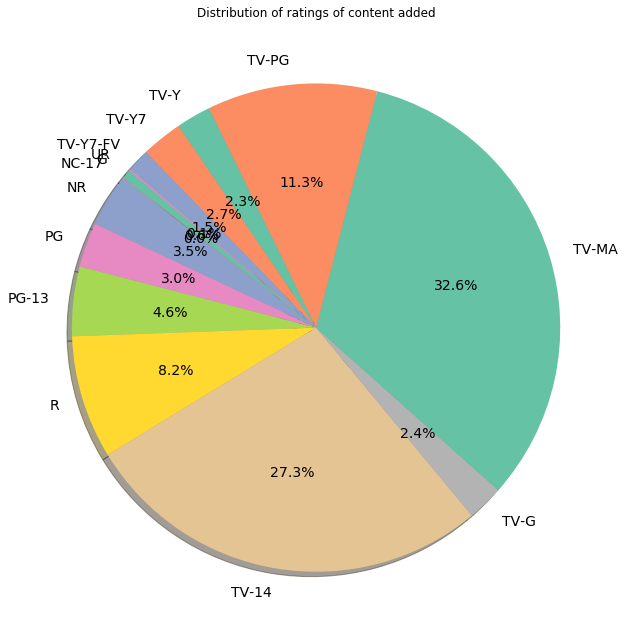

In [68]:
# Determine the distribution of ratings of content added
rating_df = netflix_df.groupby(['rating']).size().reset_index(name='count')
print(rating_df)
fig, ax = plt.subplots()
labels = rating_df['rating'].unique()
title = 'Distribution of ratings of content added'
rating_df.plot.pie(y="count", labels=labels, autopct="%1.1f%%", colors=sns.color_palette("Set2", 10),figsize=(18,9),shadow=True, startangle=140, ax=ax,legend=False, fontsize=14)
ax.set_ylabel("")
ax.set_title(title)
fig.tight_layout()
plt.savefig("figures/Shows_Ratings.png")

      rating     type  count
0          G    Movie     36
1          G  TV Show      1
2      NC-17    Movie      2
3         NR    Movie    202
4         NR  TV Show     16
5         PG    Movie    183
6         PG  TV Show      1
7      PG-13    Movie    286
8          R    Movie    506
9          R  TV Show      2
10     TV-14    Movie   1038
11     TV-14  TV Show    660
12      TV-G    Movie     80
13      TV-G  TV Show     69
14     TV-MA    Movie   1348
15     TV-MA  TV Show    679
16     TV-PG    Movie    432
17     TV-PG  TV Show    269
18      TV-Y    Movie     41
19      TV-Y  TV Show    102
20     TV-Y7    Movie     69
21     TV-Y7  TV Show    100
22  TV-Y7-FV    Movie     27
23  TV-Y7-FV  TV Show     68
24        UR    Movie      7
type       Movie  TV Show
rating                   
G           36.0      1.0
NC-17        2.0      NaN
NR         202.0     16.0
PG         183.0      1.0
PG-13      286.0      NaN
R          506.0      2.0
TV-14     1038.0    660.0
TV-G        

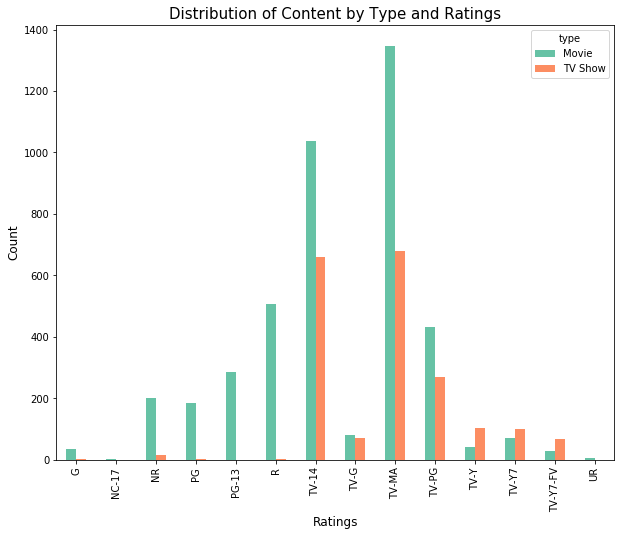

In [69]:
# Determine the distribution of ratings for movies and tv shows
rating_type_df = netflix_df.groupby(['rating','type']).size().reset_index(name='count')
print(rating_type_df)
pivot_rating_df = rating_type_df.pivot(index='rating', columns='type', values='count')
print(pivot_rating_df)
pivot_rating_df.loc[:,['Movie','TV Show']].plot.bar(color=sns.color_palette("Set2"),figsize=(10,8))
plt.title('Distribution of Content by Type and Ratings',fontsize=15)
plt.xlabel('Ratings',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.savefig("figures/Ratings_Type.png")
plt.show()

Most  of the content added seems to be in the categories of TV-MA(suitable for mature audiences) and TV-14(suited to  audience of age of 14 or older) for both movies and TV shows.

In [70]:
# Determine relationship between movie duration and ratings
movie_df = netflix_df[netflix_df['type'] == 'Movie']
movie_duration_rating_df = movie_df.groupby(['duration','rating']).size().reset_index(name='count')
dur=[]
for i in movie_duration_rating_df['duration']:
    dur.append(int(i.strip('min')))
movie_duration_rating_df['duration'] = dur
#print(movie_duration_rating_df)
print(movie_duration_rating_df.sort_values('count', ascending=False).head(30))

     duration rating  count
798        90  TV-MA     38
815        92  TV-MA     34
806        91  TV-MA     33
7         100  TV-MA     32
872        99  TV-MA     31
838        95  TV-MA     30
781        88  TV-MA     29
854        97  TV-MA     29
790        89  TV-MA     29
28        103  TV-MA     28
21        102  TV-MA     27
830        94  TV-MA     27
761        86  TV-MA     26
37        104  TV-MA     26
845        96  TV-MA     25
837        95  TV-14     25
863        98  TV-MA     23
862        98  TV-14     23
14        101  TV-MA     23
822        93  TV-MA     23
68        108  TV-MA     23
772        87  TV-MA     23
84        110  TV-MA     22
805        91  TV-14     22
752        85  TV-MA     21
821        93  TV-14     21
46        105  TV-MA     21
813        92  TV-14     21
779        88  TV-14     21
54        106  TV-MA     21


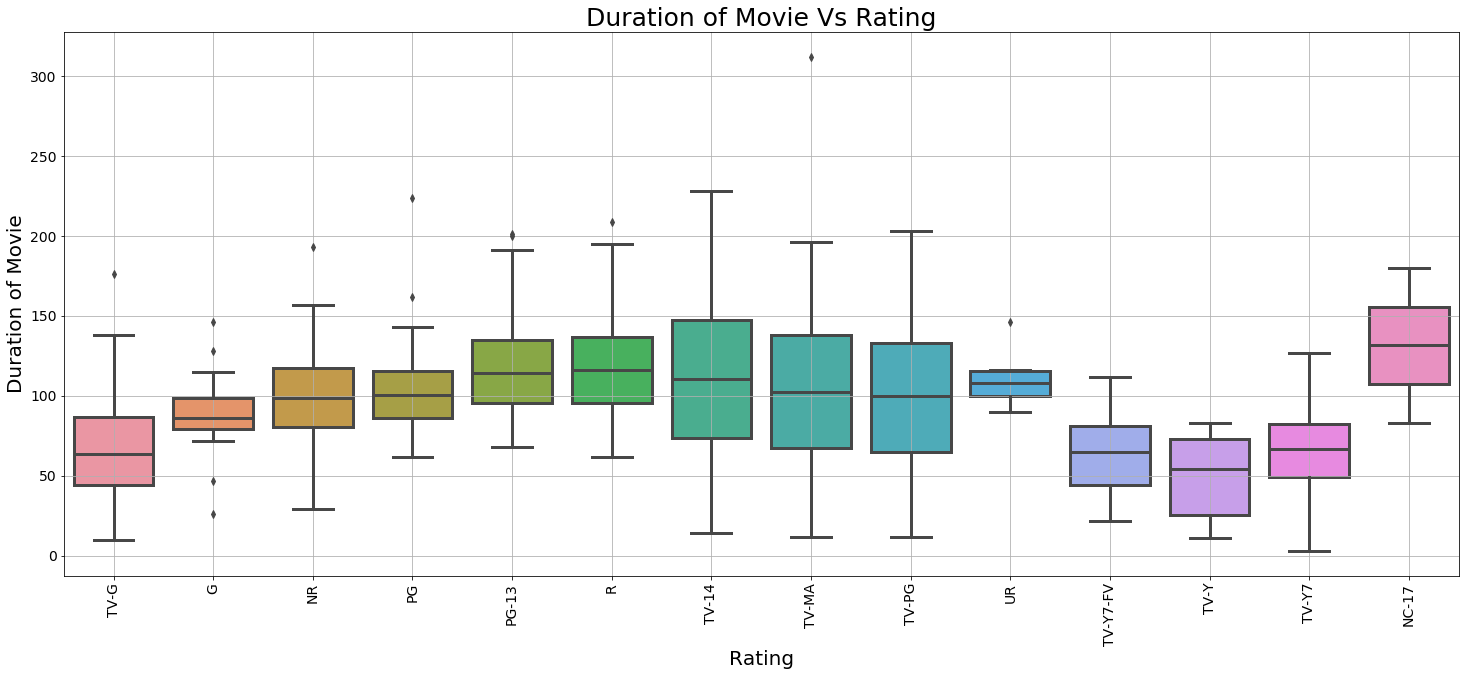

In [71]:
# Plot the relationship
plt.rcParams['figure.figsize']=(25,10)
ax = sns.boxplot(x='rating', y='duration',data=movie_duration_rating_df,width=0.8,linewidth=3)
ax.set_xlabel('Rating',fontsize=20)
ax.set_ylabel('Duration of Movie',fontsize=20)
plt.title('Duration of Movie Vs Rating',fontsize=25)
ax.tick_params(axis='x',labelsize=14,rotation=90)
ax.tick_params(axis='y',labelsize=14,rotation=0)
plt.grid()
plt.savefig("figures/MovieDuration_Rating.png")

It is interesting to note that that of all the movies added to Netflix, movies with the ratings TV-MA and TV-14 seem to be of the longest duration as well possibly suggesting age of the audience and duration of the movies might be related. However more data would be needed to support such an observation. 

The length of TV shows is expressed in terms of number of Seasons, and no information is available regarding the length of a season, in minutes. As such there is not enough information to chart a relationship between duration of a TV show and rating, similar to movies(as the above plot).

              director  count
1341         Jan Suter     21
2686       Raúl Campos     19
1376         Jay Karas     14
2043      Marcus Raboy     14
1374       Jay Chapman     12
3139  Steven Spielberg      9
2104   Martin Scorsese      9
3012   Shannon Hartman      8
1562        Johnnie To      8
3354       Umesh Mehra      8


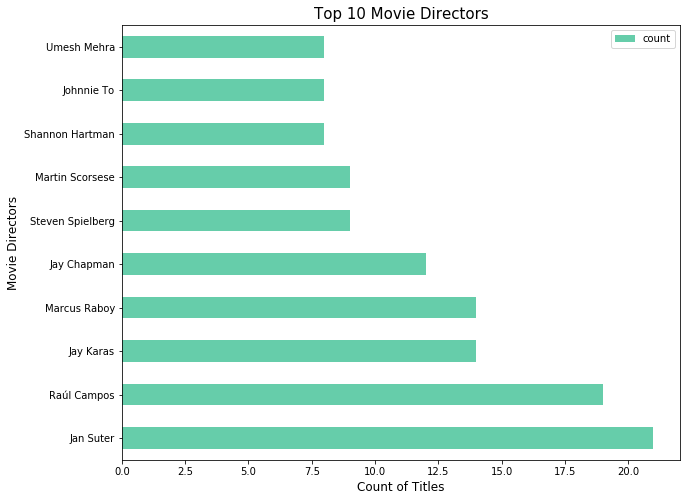

In [72]:
# Determine the most popular movie directors
movie_df = netflix_df[netflix_df['type'] == 'Movie']
mv_director = []
mv_director = (movie_df['director'].astype(str)).str.split(', ').tolist()
new_mv_df = pd.DataFrame(mv_director, index=movie_df.show_id).stack()
new_mv_df = new_mv_df.reset_index([0, 'show_id'])
new_mv_df.columns = ['show_id','director']
#print(new_mv_df)
new_mv_df = new_mv_df[new_mv_df['director'] != 'nan']
top_mv_directors_df = new_mv_df.groupby('director').size().reset_index(name='count')
top_mv_directors_df = top_mv_directors_df.sort_values('count', ascending=False).head(10)
print(top_mv_directors_df)
top_mv_directors_df.plot('director', 'count', kind='barh', facecolor='MediumAquaMarine',figsize=(10,8))
plt.xlabel('Count of Titles',fontsize=12)
plt.ylabel('Movie Directors',fontsize=12)
plt.title("Top 10 Movie Directors",fontsize=15)
plt.savefig("figures/Top10_Movie_Directors.png")

From the data, it can be noted that multiple directors have collaborated for a single movie or a tv show. Of those, Jan suter seems to have directed the most number of movies with 21 titles followed by Raúl Campos with 19 titles.

                director  count
3    Alastair Fothergill      3
71             Ken Burns      3
135          Stan Lathan      2
132          Shin Won-ho      2
123      Rob Seidenglanz      2
51        Iginio Straffi      2
68            Jung-ah Im      2
106            Onur Ünlü      1
100          Nizar Shafi      1
101           Noam Murro      1


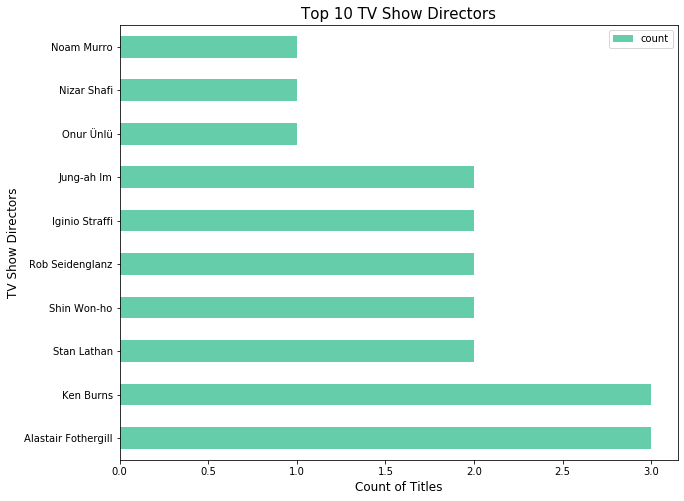

In [73]:
# Determine the most popular tv directors
tv_df = netflix_df[netflix_df['type'] == 'TV Show']
tv_director = []
tv_director = (tv_df['director'].astype(str)).str.split(', ').tolist()
new_tv_df = pd.DataFrame(tv_director, index=tv_df.show_id).stack()
new_tv_df = new_tv_df.reset_index([0, 'show_id'])
new_tv_df.columns = ['show_id','director']
#print(new_tv_df)
new_tv_df = new_tv_df[new_tv_df['director'] != 'nan']
top_tv_directors_df = new_tv_df.groupby('director').size().reset_index(name='count')
top_tv_directors_df = top_tv_directors_df.sort_values('count', ascending=False).head(10)
print(top_tv_directors_df)
top_tv_directors_df.plot('director', 'count', kind='barh', facecolor='MediumAquaMarine',figsize=(10,8))
plt.xlabel('Count of Titles',fontsize=12)
plt.ylabel('TV Show Directors',fontsize=12)
plt.title("Top 10 TV Show Directors",fontsize=15)
plt.savefig("figures/Top10_TV_Directors.png")

Coming to the TV shows, Alastair Fothergill and Ken Burns have directed the most number of TV shows with 3 titles each.

                   cast  count
1494        Anupam Kher     32
15811    Shah Rukh Khan     30
12429  Naseeruddin Shah     27
13034           Om Puri     27
428        Akshay Kumar     26
13214      Paresh Rawal     25
912    Amitabh Bachchan     24
2439        Boman Irani     23
9014     Kareena Kapoor     19
9214      Kay Kay Menon     18


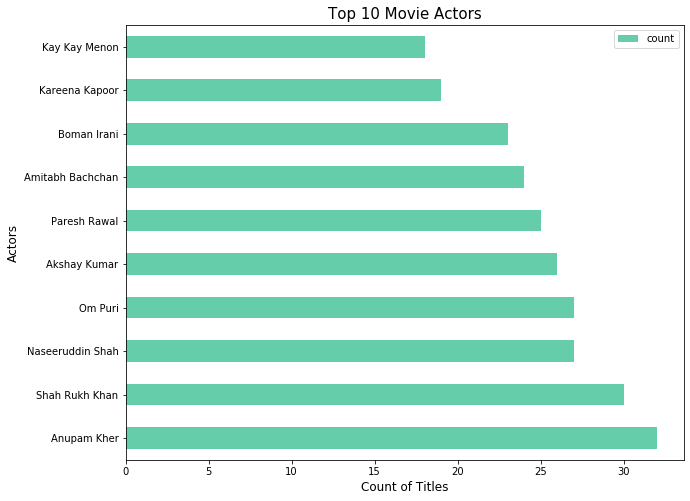

In [74]:
# Determine the most popular movie actors 
movie_df = netflix_df[netflix_df['type'] == 'Movie']
mv_actor = []
mv_actor = (movie_df['cast'].astype(str)).str.split(', ').tolist()
new_mv_df = pd.DataFrame(mv_actor, index=movie_df.show_id).stack()
new_mv_df = new_mv_df.reset_index([0, 'show_id'])
new_mv_df.columns = ['show_id','cast']
#print(new_mv_df)
new_mv_df = new_mv_df[new_mv_df['cast'] != 'nan']
top_mv_actors_df = new_mv_df.groupby('cast').size().reset_index(name='count')
top_mv_actors_df = top_mv_actors_df.sort_values('count', ascending=False).head(10)
print(top_mv_actors_df)
top_mv_actors_df.plot('cast', 'count', kind='barh', facecolor='MediumAquaMarine',figsize=(10,8))
plt.xlabel('Count of Titles',fontsize=12)
plt.ylabel('Actors',fontsize=12)
plt.title("Top 10 Movie Actors",fontsize=15)
plt.savefig("figures/Top10_Movie_Actors.png")

Anupam Kher seems to be the actor with the most number of movie titles (32) followed by Shahrukh Khan with 30 movie titles. It is also interesting to note that all the actors(with the most number of movies) listed above, are from India.

        show_id                      cast
0      70234439              Peter Cullen
1      70234439           Sumalee Montano
2      70234439              Frank Welker
3      70234439             Jeffrey Combs
4      70234439  Kevin Michael Richardson
...         ...                       ...
14794  70153404             Courteney Cox
14795  70153404               Lisa Kudrow
14796  70153404              Matt LeBlanc
14797  70153404             Matthew Perry
14798  70153404           David Schwimmer

[14799 rows x 2 columns]
                     cast  count
10167    Takahiro Sakurai     18
11229           Yuki Kaji     16
2415   David Attenborough     14
2220          Daisuke Ono     14
10516     Tomokazu Sugita     12
3942       Hiroshi Kamiya     12
5251         Jun Fukuyama     12
917         Ashleigh Ball     12
191             Ai Kayano     11
10261        Tay Ping Hui     11


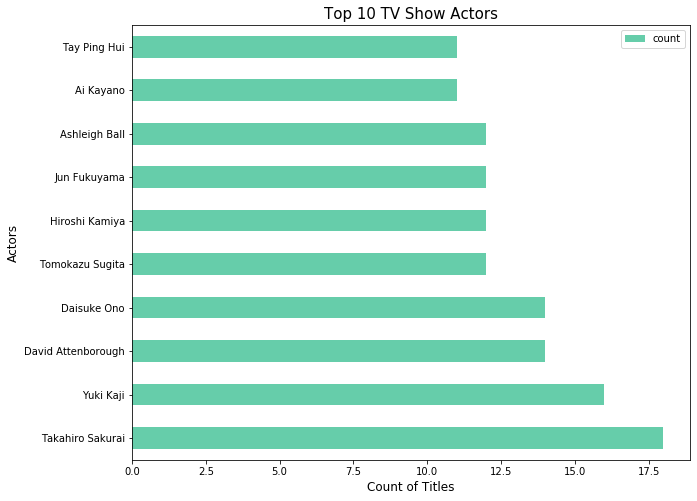

In [75]:
# Determine the most popular tv actors
tv_df = netflix_df[netflix_df['type'] == 'TV Show']
tv_actor = []
tv_actor = (tv_df['cast'].astype(str)).str.split(', ').tolist()
new_tv_df = pd.DataFrame(tv_actor, index=tv_df.show_id).stack()
new_tv_df = new_tv_df.reset_index([0, 'show_id'])
new_tv_df.columns = ['show_id','cast']
print(new_tv_df)
new_tv_df = new_tv_df[new_tv_df['cast'] != 'nan']
top_tv_actors_df = new_tv_df.groupby('cast').size().reset_index(name='count')
top_tv_actors_df = top_tv_actors_df.sort_values('count', ascending=False).head(10)
print(top_tv_actors_df)
top_tv_actors_df.plot('cast', 'count', kind='barh', facecolor='MediumAquaMarine',figsize=(10,8))
plt.xlabel('Count of Titles',fontsize=12)
plt.ylabel('Actors',fontsize=12)
plt.title("Top 10 TV Show Actors",fontsize=15)
plt.savefig("figures/Top10_TV_Actors.png")

Similarly,actor Takahiro Sakurai acted in the most number of TV shows with 18 titles followed closely by actor Yuki Kaji with 16 titles. 

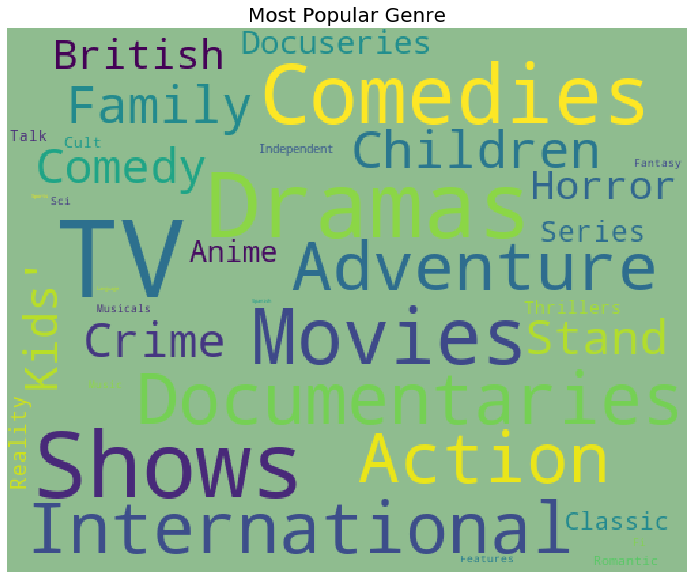

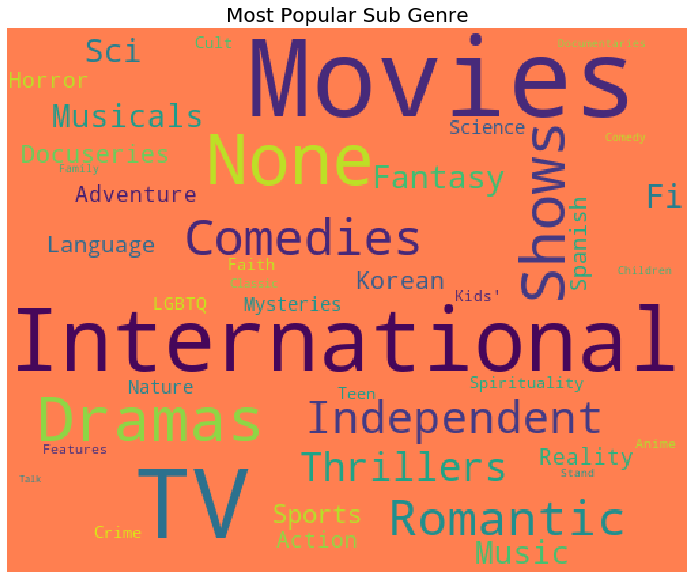

In [76]:
# Depict the most popular Genres & Sub-Genres
genres = []
genres = netflix_df['Genre Main Category'].astype(str)
genres = [x for x in genres if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(width=500,height=400,background_color="DarkSeaGreen",mode="RGBA",stopwords=stopwords, max_font_size=80,collocations=False).generate(' '.join
                                                                                           (genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Popular Genre", fontsize=20)
plt.savefig("figures/Popular_Genres.png")
plt.show()

sub_genres = []
sub_genres = netflix_df['Genre Sub Category'].astype(str)
sub_genres = [x for x in sub_genres if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(width=500,height=400,background_color="Coral", mode="RGBA",stopwords=stopwords, max_font_size=80,collocations=False).generate(' '.join
                                                                                           (sub_genres))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most Popular Sub Genre", fontsize=20)
plt.savefig("figures/Popular_SubGenres.png")
plt.show()

Dramas and Comedies are the categories with the most number of titles added.

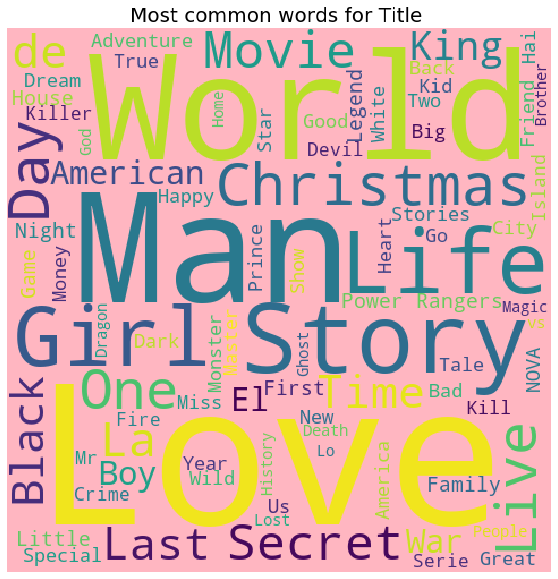

In [77]:
#Determine the most common words used for titles in the content added
titles = []
titles = netflix_df['title'].astype(str)
titles = [x for x in titles if str(x) != 'nan']
stopwords = STOPWORDS
wordcloud = WordCloud(width=480, height=480, background_color="LightPink", mode="RGBA",stopwords=stopwords, min_font_size=10,max_words=150).generate(' '.join
                                                                                           (titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Most common words for Title ", fontsize=20)
plt.savefig("figures/Common_Words_Title.png")
plt.show()

Love,World,Man, etc are some of the most prominent words used for titles of the content added to Netflix.

# Analysis by Neelam

In [78]:
Newfile_df=pd.DataFrame(netflix_df)
Newfile_df

show_id     type                                        title  \
0     81145628    Movie      Norm of the North: King Sized Adventure   
1     80117401    Movie                   Jandino: Whatever it Takes   
2     70234439  TV Show                           Transformers Prime   
3     80058654  TV Show             Transformers: Robots in Disguise   
4     80125979    Movie                                 #realityhigh   
...        ...      ...                                          ...   
6229  80000063  TV Show                                 Red vs. Blue   
6230  70286564  TV Show                                        Maron   
6231  80116008    Movie       Little Baby Bum: Nursery Rhyme Friends   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories   
6233  70153404  TV Show                                      Friends   

                      director  \
0     Richard Finn, Tim Maltby   
1                          NaN   
2                          NaN   
3                          NaN   
4             Fernando Lebrija   
...                        ...   
6229                       NaN   
6230                       NaN   
6231                       NaN   
6232                       NaN   
6233                       NaN   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                      Jandino Asporaat   
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   
4     Nesta Cooper, Kate Walsh, John Michael Higgins...   
...                                                 ...   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   
6231                                                NaN   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   

                                       country date_added_corrected  \
0     United States, India, South Korea, China           2019-09-09   
1                               United Kingdom           2016-09-09   
2                                United States           2018-09-08   
3                                United States           2018-09-08   
4                                United States           2017-09-08   
...                                        ...                  ...   
6229                             United States                  NaT   
6230                             United States                  NaT   
6231                                       NaN                  NaT   
6232                            United Kingdom                  NaT   
6233                             United States                  NaT   

      release_year    rating    duration  \
0             2019     TV-PG      90 min   
1             2016     TV-MA      94 min   
2             2013  TV-Y7-FV    1 Season   
3             2016     TV-Y7    1 Season   
4             2017     TV-14      99 min   
...            ...       ...         ...   
6229          2015        NR  13 Seasons   
6230          2016     TV-MA   4 Seasons   
6231          2016       NaN      60 min   
6232          2013     TV-MA   2 Seasons   
6233          2003     TV-14  10 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1                                       Stand-Up Comedy   
2                                              Kids' TV   
3                                              Kids' TV   
4                                              Comedies   
...                                                 ...   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6231                                             Movies   
6232           British TV Shows, TV Comedies, TV Dra

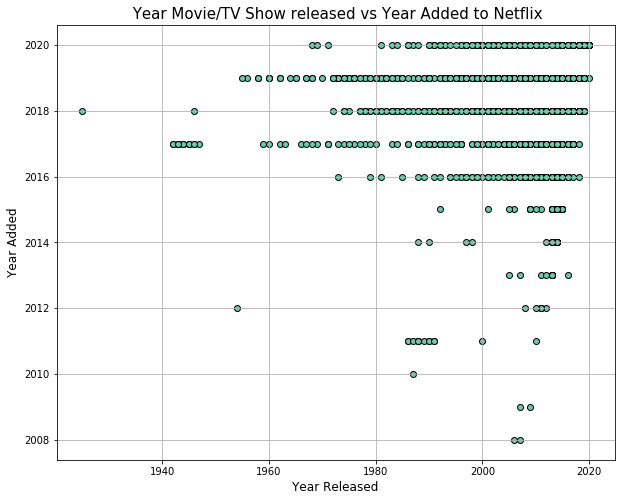

In [79]:
# creating a scatter plot to determine the time lag(correlation) between the movie release year and date added:

x = netflix_df["release_year"].values
y = netflix_df["year added"].values

plt.figure(figsize=(10,8))
plt.grid()
plt.title(" Year Movie/TV Show released vs Year Added to Netflix", fontsize=15)
plt.xlabel("Year Released", fontsize=12)
plt.ylabel("Year Added",fontsize=12)
plt.scatter(x, y,facecolor='MediumAquaMarine',edgecolor='black',cmap=True,linewidth=1)
plt.savefig("figures/Analysis of Year Released and Year Added")
plt.show()


In [80]:
# Calculating the correlation coefficient between the year Movies/TV Show were released with added to Netflix:
netflix_df.dropna(inplace = True)

released = netflix_df.iloc[:,7]
added = netflix_df.iloc[:,14]

correlation = st.pearsonr(released,added)

print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is -0.08


The above plot analyses the relationship between the year movie was released and when it was added to Netflix. There is less to no correlation between the two variables. We do see that some of the movies that were released in between 1980 to 2000 werent added to Netflix until 2011.

In [81]:
# Splitting the director column as some rows hold multiple values(NRB):

Newfile_df2 = Newfile_df["director"].str.split(",", n = 1, expand = True)
Newfile_df2


0            1
0         Richard Finn   Tim Maltby
1                  NaN          NaN
2                  NaN          NaN
3                  NaN          NaN
4     Fernando Lebrija         None
...                ...          ...
6229               NaN          NaN
6230               NaN          NaN
6231               NaN          NaN
6232               NaN          NaN
6233               NaN          NaN

[6234 rows x 2 columns]

In [82]:
# Adding new rows to hold the values of the directors(NRB):

netflix_df["director1"]=Newfile_df2[0]
netflix_df["director2"]=Newfile_df2[1]
netflix_df

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
6     70304989    Movie                                 Automata   
9     70304990    Movie                              Good People   
11    70299204    Movie                  Kidnapping Mr. Heineken   
19    80057969    Movie                                     Love   
...        ...      ...                                      ...   
6142  80063224  TV Show            The Great British Baking Show   
6158  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
6167  80115328  TV Show                             Sacred Games   
6182  80176842  TV Show                         Men on a Mission   
6213  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
6                              Gabe Ibáñez   
9                        Henrik Ruben Genz   
11                        Daniel Alfredson   
19                              Gaspar Noé   
...                                    ...   
6142                       Andy Devonshire   
6158                         Thomas Astruc   
6167  Vikramaditya Motwane, Anurag Kashyap   
6182                            Jung-ah Im   
6213                             Onur Ünlü   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
6     Antonio Banderas, Dylan McDermott, Melanie Gri...   
9     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
11    Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
19    Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...   
...                                                 ...   
6142  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
6158  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
6167  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
6182  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
6213  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                                country date_added_corrected  \
0              United States, India, South Korea, China           2019-09-09   
6                Bulgaria, United States, Spain, Canada           2017-09-08   
9        United States, United Kingdom, Denmark, Sweden           2017-09-08   
11    Netherlands, Belgium, United Kingdom, United S...           2017-09-08   
19                                      France, Belgium           2017-09-08   
...                                                 ...                  ...   
6142                                     United Kingdom           2019-08-30   
6158                         France, South Korea, Japan           2019-08-02   
6167                               India, United States           2019-08-15   
6182                                        South Korea           2019-04-09   
6213                                             Turkey           2017-04-15   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
6             2014      R    110 min   
9             2014      R     90 min   
11            2015      R     95 min   
19            2015     NR    135 min   
...            ...    ...        ...   
6142          2019  TV-PG  7 Seasons   
6158          2018  TV-Y7  4 Seasons   
6167          2019  TV-MA  2 Seasons   
6182          2019  TV-14  4 Seasons   
6213          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
6     International Movies, Sci-Fi & Fantasy, Thrillers   
9                         Action & Adventure, Thrillers   
11     Action & Adventure, Dramas, International Movies   
19              Cult Movies, Dramas, Independent Movies   
...                                                 ...   
6142                       British TV Shows, Reality TV   
6158          

In [83]:
# Dropping off Director2 column asI do not need it in my analysis(NRB):

Newfile_df3 = netflix_df.drop(['director2'], axis=1)
Newfile_df3

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
6     70304989    Movie                                 Automata   
9     70304990    Movie                              Good People   
11    70299204    Movie                  Kidnapping Mr. Heineken   
19    80057969    Movie                                     Love   
...        ...      ...                                      ...   
6142  80063224  TV Show            The Great British Baking Show   
6158  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
6167  80115328  TV Show                             Sacred Games   
6182  80176842  TV Show                         Men on a Mission   
6213  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
6                              Gabe Ibáñez   
9                        Henrik Ruben Genz   
11                        Daniel Alfredson   
19                              Gaspar Noé   
...                                    ...   
6142                       Andy Devonshire   
6158                         Thomas Astruc   
6167  Vikramaditya Motwane, Anurag Kashyap   
6182                            Jung-ah Im   
6213                             Onur Ünlü   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
6     Antonio Banderas, Dylan McDermott, Melanie Gri...   
9     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
11    Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
19    Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...   
...                                                 ...   
6142  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
6158  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
6167  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
6182  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
6213  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                                country date_added_corrected  \
0              United States, India, South Korea, China           2019-09-09   
6                Bulgaria, United States, Spain, Canada           2017-09-08   
9        United States, United Kingdom, Denmark, Sweden           2017-09-08   
11    Netherlands, Belgium, United Kingdom, United S...           2017-09-08   
19                                      France, Belgium           2017-09-08   
...                                                 ...                  ...   
6142                                     United Kingdom           2019-08-30   
6158                         France, South Korea, Japan           2019-08-02   
6167                               India, United States           2019-08-15   
6182                                        South Korea           2019-04-09   
6213                                             Turkey           2017-04-15   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
6             2014      R    110 min   
9             2014      R     90 min   
11            2015      R     95 min   
19            2015     NR    135 min   
...            ...    ...        ...   
6142          2019  TV-PG  7 Seasons   
6158          2018  TV-Y7  4 Seasons   
6167          2019  TV-MA  2 Seasons   
6182          2019  TV-14  4 Seasons   
6213          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
6     International Movies, Sci-Fi & Fantasy, Thrillers   
9                         Action & Adventure, Thrillers   
11     Action & Adventure, Dramas, International Movies   
19              Cult Movies, Dramas, Independent Movies   
...                                                 ...   
6142                       British TV Shows, Reality TV   
6158          

### Reading additional dataset: Female Director List from IMDB

In [84]:
# Reading the IMDB Female Directors List (Additional Datset)(NRB):

IMDBFemaleDir = pd.read_csv("LIST OF FEMALE DIRECTORS.csv", encoding = 'unicode_escape')
IMDBFemaleDir.head()

Position      Const    Created   Modified  Description             Name  \
0         1  nm1148550  12/5/2017  12/5/2017          NaN     Ava DuVernay   
1         2  nm1950086  12/5/2017  12/5/2017          NaN     Greta Gerwig   
2         3  nm0001068  12/5/2017  12/5/2017          NaN    Sofia Coppola   
3         4  nm2011696  12/6/2017  12/6/2017          NaN         Dee Rees   
4         5  nm0000941  12/5/2017  12/5/2017          NaN  Kathryn Bigelow   

             Known For  Birth Date  
0          Queen Sugar   8/24/1972  
1            Lady Bird    8/4/1983  
2  Lost in Translation   5/14/1971  
3             Mudbound         NaN  
4      The Hurt Locker  11/27/1951

In [85]:
# Updating the column heading (NRB):

IMDBFemaleDir_df = IMDBFemaleDir.rename(columns={"Name": "director1"})
IMDBFemaleDir_df

Position      Const     Created    Modified  Description  \
0           1  nm1148550   12/5/2017   12/5/2017          NaN   
1           2  nm1950086   12/5/2017   12/5/2017          NaN   
2           3  nm0001068   12/5/2017   12/5/2017          NaN   
3           4  nm2011696   12/6/2017   12/6/2017          NaN   
4           5  nm0000941   12/5/2017   12/5/2017          NaN   
..        ...        ...         ...         ...          ...   
192       193  nm2000954   7/24/2019   7/24/2019          NaN   
193       194  nm4826506   7/24/2019   7/24/2019          NaN   
194       195  nm2859868   7/25/2019   7/25/2019          NaN   
195       196  nm3997700   8/31/2019   8/31/2019          NaN   
196       197  nm3052903  10/18/2019  10/18/2019          NaN   

           director1                                Known For  Birth Date  
0       Ava DuVernay                              Queen Sugar   8/24/1972  
1       Greta Gerwig                                Lady Bird    8/4/1983  
2      Sofia Coppola                      Lost in Translation   5/14/1971  
3           Dee Rees                                 Mudbound         NaN  
4    Kathryn Bigelow                          The Hurt Locker  11/27/1951  
..               ...                                      ...         ...  
192     Hannah Marks  Dirk Gently's Holistic Detective Agency   4/13/1993  
193    Cara Stricker                                 Maverick         NaN  
194  Nikole Beckwith                  Stockholm, Pennsylvania         NaN  
195  Houda Benyamina                                  Divines  11/30/1980  
196   Alison Klayman                   Ai Weiwei: Never Sorry         NaN  

[197 rows x 8 columns]

In [86]:
# Adding the Gender Column(NRB):

IMDBFemaleDir_df["Gender"] = "Female"
IMDBFemaleDir_df

Position      Const     Created    Modified  Description  \
0           1  nm1148550   12/5/2017   12/5/2017          NaN   
1           2  nm1950086   12/5/2017   12/5/2017          NaN   
2           3  nm0001068   12/5/2017   12/5/2017          NaN   
3           4  nm2011696   12/6/2017   12/6/2017          NaN   
4           5  nm0000941   12/5/2017   12/5/2017          NaN   
..        ...        ...         ...         ...          ...   
192       193  nm2000954   7/24/2019   7/24/2019          NaN   
193       194  nm4826506   7/24/2019   7/24/2019          NaN   
194       195  nm2859868   7/25/2019   7/25/2019          NaN   
195       196  nm3997700   8/31/2019   8/31/2019          NaN   
196       197  nm3052903  10/18/2019  10/18/2019          NaN   

           director1                                Known For  Birth Date  \
0       Ava DuVernay                              Queen Sugar   8/24/1972   
1       Greta Gerwig                                Lady Bird    8/4/1983   
2      Sofia Coppola                      Lost in Translation   5/14/1971   
3           Dee Rees                                 Mudbound         NaN   
4    Kathryn Bigelow                          The Hurt Locker  11/27/1951   
..               ...                                      ...         ...   
192     Hannah Marks  Dirk Gently's Holistic Detective Agency   4/13/1993   
193    Cara Stricker                                 Maverick         NaN   
194  Nikole Beckwith                  Stockholm, Pennsylvania         NaN   
195  Houda Benyamina                                  Divines  11/30/1980   
196   Alison Klayman                   Ai Weiwei: Never Sorry         NaN   

     Gender  
0    Female  
1    Female  
2    Female  
3    Female  
4    Female  
..      ...  
192  Female  
193  Female  
194  Female  
195  Female  
196  Female  

[197 rows x 9 columns]

In [87]:
# Dropping off all the unnecessary columns from IMDB Dataset (NRB):

Updated_IMDBFemaleDir_df = IMDBFemaleDir_df.drop(['Position', 'Const', 'Created','Modified','Description',
                                                 'Known For','Birth Date'], axis=1)
Updated_IMDBFemaleDir_df

director1  Gender
0       Ava DuVernay  Female
1       Greta Gerwig  Female
2      Sofia Coppola  Female
3           Dee Rees  Female
4    Kathryn Bigelow  Female
..               ...     ...
192     Hannah Marks  Female
193    Cara Stricker  Female
194  Nikole Beckwith  Female
195  Houda Benyamina  Female
196   Alison Klayman  Female

[197 rows x 2 columns]

In [88]:
# Dropping off Duplicates (NRB):

Updated_IMDBFemaleDir_df_nodups = Updated_IMDBFemaleDir_df.drop_duplicates()
Updated_IMDBFemaleDir_df_nodups

director1  Gender
0       Ava DuVernay  Female
1       Greta Gerwig  Female
2      Sofia Coppola  Female
3           Dee Rees  Female
4    Kathryn Bigelow  Female
..               ...     ...
192     Hannah Marks  Female
193    Cara Stricker  Female
194  Nikole Beckwith  Female
195  Houda Benyamina  Female
196   Alison Klayman  Female

[195 rows x 2 columns]

In [89]:
# Merging both files for analysis (NRB)

Combined_files1= pd.merge(Newfile_df3,Updated_IMDBFemaleDir_df_nodups,how='left',on=['director1'],sort=False)
Combined_files1

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     70304989    Movie                                 Automata   
2     70304990    Movie                              Good People   
3     70299204    Movie                  Kidnapping Mr. Heineken   
4     80057969    Movie                                     Love   
...        ...      ...                                      ...   
2967  80063224  TV Show            The Great British Baking Show   
2968  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
2969  80115328  TV Show                             Sacred Games   
2970  80176842  TV Show                         Men on a Mission   
2971  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
1                              Gabe Ibáñez   
2                        Henrik Ruben Genz   
3                         Daniel Alfredson   
4                               Gaspar Noé   
...                                    ...   
2967                       Andy Devonshire   
2968                         Thomas Astruc   
2969  Vikramaditya Motwane, Anurag Kashyap   
2970                            Jung-ah Im   
2971                             Onur Ünlü   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1     Antonio Banderas, Dylan McDermott, Melanie Gri...   
2     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
3     Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
4     Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...   
...                                                 ...   
2967  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
2968  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
2969  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
2970  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
2971  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                                country date_added_corrected  \
0              United States, India, South Korea, China           2019-09-09   
1                Bulgaria, United States, Spain, Canada           2017-09-08   
2        United States, United Kingdom, Denmark, Sweden           2017-09-08   
3     Netherlands, Belgium, United Kingdom, United S...           2017-09-08   
4                                       France, Belgium           2017-09-08   
...                                                 ...                  ...   
2967                                     United Kingdom           2019-08-30   
2968                         France, South Korea, Japan           2019-08-02   
2969                               India, United States           2019-08-15   
2970                                        South Korea           2019-04-09   
2971                                             Turkey           2017-04-15   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
1             2014      R    110 min   
2             2014      R     90 min   
3             2015      R     95 min   
4             2015     NR    135 min   
...            ...    ...        ...   
2967          2019  TV-PG  7 Seasons   
2968          2018  TV-Y7  4 Seasons   
2969          2019  TV-MA  2 Seasons   
2970          2019  TV-14  4 Seasons   
2971          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1     International Movies, Sci-Fi & Fantasy, Thrillers   
2                         Action & Adventure, Thrillers   
3      Action & Adventure, Dramas, International Movies   
4               Cult Movies, Dramas, Independent Movies   
...                                                 ...   
2967                       British TV Shows, Reality TV   
2968          

In [90]:
# Generating a CSV file for data validation(NRB):

output_file10 = "FirstMerge.csv"
with open(output_file10, 'w') as datafile:
    Combined_files1.to_csv(output_file10, index=False, header=True)

In [91]:
# Reading the csv (NRB):

Merge1_df = pd.read_csv("FirstMerge.csv", encoding = 'unicode escape')
Merge1_df

show_id     type                                    title  \
0     81145628    Movie  Norm of the North: King Sized Adventure   
1     70304989    Movie                                 Automata   
2     70304990    Movie                              Good People   
3     70299204    Movie                  Kidnapping Mr. Heineken   
4     80057969    Movie                                     Love   
...        ...      ...                                      ...   
2967  80063224  TV Show            The Great British Baking Show   
2968  80164216  TV Show  Miraculous: Tales of Ladybug & Cat Noir   
2969  80115328  TV Show                             Sacred Games   
2970  80176842  TV Show                         Men on a Mission   
2971  80126599  TV Show                         Leyla and Mecnun   

                                  director  \
0                 Richard Finn, Tim Maltby   
1                            Gabe IbÃ¡Ã±ez   
2                        Henrik Ruben Genz   
3                         Daniel Alfredson   
4                              Gaspar NoÃ©   
...                                    ...   
2967                       Andy Devonshire   
2968                         Thomas Astruc   
2969  Vikramaditya Motwane, Anurag Kashyap   
2970                            Jung-ah Im   
2971                           Onur ÃnlÃ¼   

                                                   cast  \
0     Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1     Antonio Banderas, Dylan McDermott, Melanie Gri...   
2     James Franco, Kate Hudson, Tom Wilkinson, Omar...   
3     Jim Sturgess, Sam Worthington, Ryan Kwanten, A...   
4     Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...   
...                                                 ...   
2967  Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
2968  Cristina Vee, Bryce Papenbrook, Keith Silverst...   
2969  Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...   
2970  Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...   
2971  Ali Atay, Melis Birkan, Serkan Keskin, Ahmet M...   

                                                country date_added_corrected  \
0              United States, India, South Korea, China           2019-09-09   
1                Bulgaria, United States, Spain, Canada           2017-09-08   
2        United States, United Kingdom, Denmark, Sweden           2017-09-08   
3     Netherlands, Belgium, United Kingdom, United S...           2017-09-08   
4                                       France, Belgium           2017-09-08   
...                                                 ...                  ...   
2967                                     United Kingdom           2019-08-30   
2968                         France, South Korea, Japan           2019-08-02   
2969                               India, United States           2019-08-15   
2970                                        South Korea           2019-04-09   
2971                                             Turkey           2017-04-15   

      release_year rating   duration  \
0             2019  TV-PG     90 min   
1             2014      R    110 min   
2             2014      R     90 min   
3             2015      R     95 min   
4             2015     NR    135 min   
...            ...    ...        ...   
2967          2019  TV-PG  7 Seasons   
2968          2018  TV-Y7  4 Seasons   
2969          2019  TV-MA  2 Seasons   
2970          2019  TV-14  4 Seasons   
2971          2014  TV-PG  3 Seasons   

                                              listed_in  \
0                    Children & Family Movies, Comedies   
1     International Movies, Sci-Fi & Fantasy, Thrillers   
2                         Action & Adventure, Thrillers   
3      Action & Adventure, Dramas, International Movies   
4               Cult Movies, Dramas, Independent Movies   
...                                                 ...   
2967                       British TV Shows, Reality TV   
2968          

In [92]:
# Filling value as Other in column Gender for directors other than Female:(NRB)

Merge1_df["Gender"].fillna("Other", inplace=True)


In [93]:
# Creating a new dataframe for analyzing the relationship of Directors with Genre Main Category:(NRB)

A1 = Merge1_df.loc[:,['Genre Main Category','Gender','director1']]
df = pd.DataFrame(A1)
df

Genre Main Category Gender             director1
0     Children & Family Movies  Other          Richard Finn
1         International Movies  Other         Gabe IbÃ¡Ã±ez
2           Action & Adventure  Other     Henrik Ruben Genz
3           Action & Adventure  Other      Daniel Alfredson
4                  Cult Movies  Other           Gaspar NoÃ©
...                        ...    ...                   ...
2967          British TV Shows  Other       Andy Devonshire
2968                  Kids' TV  Other         Thomas Astruc
2969            Crime TV Shows  Other  Vikramaditya Motwane
2970    International TV Shows  Other            Jung-ah Im
2971    International TV Shows  Other           Onur ÃnlÃ¼

[2972 rows x 3 columns]

In [94]:
# Creating new dataframe by grouping the Gender with Genre to see the count of Directors in each Genre (NRB)

A2 = Merge1_df.groupby(['Gender','Genre Main Category']).count()['director1']
A2

Gender  Genre Main Category         
Female  Action & Adventure                7
        Classic Movies                    1
        Comedies                         12
        Documentaries                     2
        Dramas                           27
        Horror Movies                     1
        Independent Movies                1
Other   Action & Adventure              508
        Anime Features                    8
        Anime Series                      8
        British TV Shows                 17
        Children & Family Movies        214
        Classic & Cult TV                 1
        Classic Movies                   53
        Comedies                        687
        Crime TV Shows                   19
        Cult Movies                      10
        Documentaries                   157
        Docuseries                        1
        Dramas                          933
        Horror Movies                   162
        Independent Movies             

In [95]:
# Sorting values for better depiction:(NRB)

df2= pd.DataFrame(A2)
df2


director1
Gender Genre Main Category                    
Female Action & Adventure                    7
       Classic Movies                        1
       Comedies                             12
       Documentaries                         2
       Dramas                               27
       Horror Movies                         1
       Independent Movies                    1
Other  Action & Adventure                  508
       Anime Features                        8
       Anime Series                          8
       British TV Shows                     17
       Children & Family Movies            214
       Classic & Cult TV                     1
       Classic Movies                       53
       Comedies                            687
       Crime TV Shows                       19
       Cult Movies                          10
       Documentaries                       157
       Docuseries                            1
       Dramas                              933
       Horror Movies                       162
       Independent Movies                   16
       International Movies                 75
       International TV Shows               24
       Kids' TV                              5
       Music & Musicals                      5
       Sci-Fi & Fantasy                      9
       Stand-Up Comedy & Talk Shows          4
       TV Action & Adventure                 2
       TV Comedies                           1
       TV Dramas                             1
       TV Horror                             1

In [96]:
# Dropping off the 'Other' category from gender to analyze the number of female directors for each Genre: (NRB)

df3 = pd.DataFrame(df2.drop('Other').sort_values(by="director1",ascending=False).reset_index())
df3

Gender Genre Main Category  director1
0  Female              Dramas         27
1  Female            Comedies         12
2  Female  Action & Adventure          7
3  Female       Documentaries          2
4  Female      Classic Movies          1
5  Female       Horror Movies          1
6  Female  Independent Movies          1

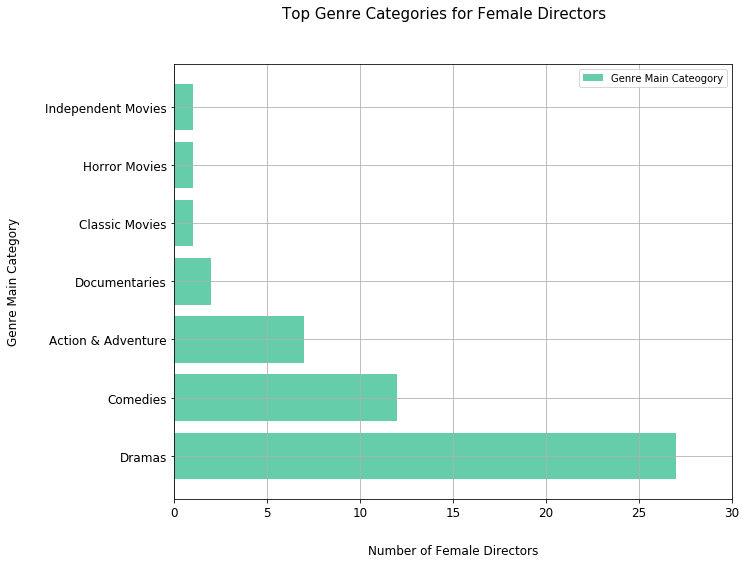

In [97]:
# Plotting the dataframe: (NRB)

plt.figure(figsize = (10,8))

x_axis = df3["Genre Main Category"].values
plt.barh(x_axis, df3['director1'] , facecolor="MediumAquaMarine", label = 'Genre Main Cateogory',
        align="center" )
#ax = df3.plot(kind="barh",colormap='winter', zorder=2, width=0.75,figsize = (20,10))
labels= ["Dramas", "Documentaries","Comedies", "Action & Adventure", "Classic Movies", "Horror Movies", 
         "Independent Movies"]

plt.grid()
plt.yticks(labels, fontsize=12)
plt.xticks(fontsize=12)
plt.legend()
plt.xlim(0,30)
plt.xlabel("Number of Female Directors", labelpad=25, size=12)
plt.ylabel("Genre Main Category", labelpad=25, size=12)
plt.suptitle("Top Genre Categories for Female Directors", size=15)
plt.savefig('figures/Top Genres for Female Directors')
plt.show()


The above plot analyzes the relationship between the Number of Female Directors and the Genre Category they directed. We see that 'Dramas' is the most likeable genre category for female directors or female directors are most likely to direct Movies that are dramatic.

In [98]:
# Grouping the type with gender to determine how many female directors vs Other 
# (Other includes multiple and male directors)(NRB)

df1 = pd.DataFrame(Merge1_df.groupby(['Gender','type']).count()['director1'])
df1

director1
Gender type              
Female Movie           51
Other  Movie         2837
       TV Show         84

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



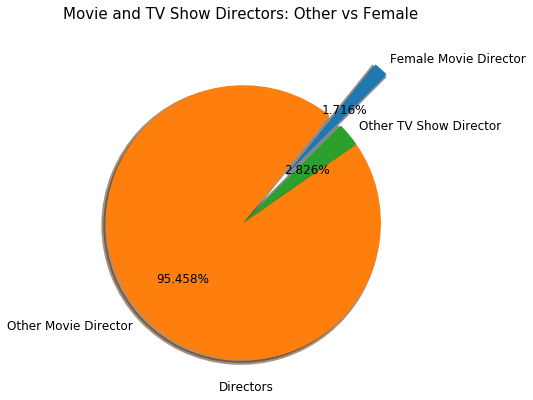

In [99]:
# Plotting the dataframe to display the ratio of female directors verus other and type they directed:(NRB)

explode = (0.5,0,0)
plt.figure(figsize=(6,6))
newcolumns=["Female Movie Director", "Other Movie Director", "Other TV Show Director"]
wedgeprops = {"linewidth": 4, 'width':1}
plt.pie(df1, labels=newcolumns, explode=explode,autopct="%1.3f%%", shadow=True, startangle=45, 
        textprops={'fontsize': 12}, wedgeprops = wedgeprops)
plt.xlabel('Directors', fontsize=12)
plt.axis('equal')
plt.tight_layout
plt.suptitle("Movie and TV Show Directors: Other vs Female", fontsize=15)
plt.savefig('figures/Number of Movie and TV Show Directors-Female versus Other')
plt.show()


The above plot displays the ratio of Female Directors as opposed to Other Category( which includes Male and multiple directors) who have directed Movies and TV Show. Female Directors only comprise 1.749% of the total Directors population directing Movies and TV shows. We see that Female directors haven't directed any TV Show. The below plot excludes the directors who directed TV Shows and we can see that the ratio slightly increases to 1.800%

In [100]:
# Creating new DataFrame to show the ratio of Female Directors versus Other 
# who directed Movies and dropping off the TV Show values:(NRB)

df2 = Merge1_df.groupby(['type','Gender']).count()['director1']
df3 = pd.DataFrame(df2.drop('TV Show'))
df3

director1
type  Gender           
Movie Female         51
      Other        2837

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



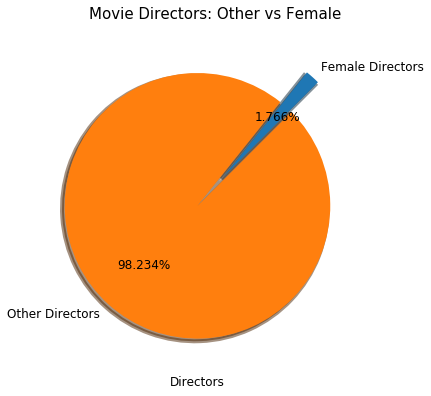

In [101]:
# Plotting the dataframe:(NRB)

plt.figure(figsize=(6,6))
labels=["Female Directors", "Other Directors"]
wedgeprops = {"linewidth": 4, 'width':1}
explode = (0.3,0)
plt.pie(df3, labels=labels,explode=explode,autopct="%1.3f%%", shadow=True, startangle=45, 
        textprops={'fontsize': 12}, wedgeprops = wedgeprops,)
plt.xlabel('Directors', fontsize=12)
plt.tight_layout()
plt.suptitle("Movie Directors: Other vs Female", fontsize=15)
plt.savefig('figures/Number of Directors-Female versus Other')
plt.show()

The above plot analyzes the ratio of Female Directors with Others. As we see only 1.740% of total directors are Female.

In [102]:
# Creating dataframe of data grouped by gender and duration (NRB)

df4 = Merge1_df[Merge1_df['type'] == 'Movie']
df5 = pd.DataFrame(df4.groupby(['Gender','duration']).size().reset_index(name="Count"))
dur=[]
for i in df5['duration']:
    dur.append(int(i.strip('min')))
df5['duration'] = dur
df5

Gender  duration  Count
0    Female       100      2
1    Female       101      1
2    Female       102      2
3    Female       105      2
4    Female       107      3
..      ...       ...    ...
193   Other        95     73
194   Other        96     63
195   Other        97     66
196   Other        98     62
197   Other        99     64

[198 rows x 3 columns]

In [103]:
# Dropping off the 'Other' from Gender to analyze the relationship between 
# the Female Directors and the duration of movies they produced: (NRB)

df6 = df5[df5.Gender != "Other"].sort_values(by='duration',ascending=False)
df6

Gender  duration  Count
20  Female       172      1
19  Female       163      1
18  Female       138      2
17  Female       136      1
16  Female       135      1
15  Female       133      1
14  Female       129      1
13  Female       128      1
12  Female       124      2
11  Female       119      2
10  Female       115      1
9   Female       113      1
8   Female       112      2
7   Female       111      1
6   Female       110      2
5   Female       108      1
4   Female       107      3
3   Female       105      2
2   Female       102      2
1   Female       101      1
0   Female       100      2
34  Female        99      1
33  Female        98      3
32  Female        97      2
31  Female        96      1
30  Female        95      1
29  Female        94      1
28  Female        93      2
27  Female        92      2
26  Female        91      1
25  Female        90      1
24  Female        84      2
23  Female        80      1
22  Female        67      1
21  Female        57      1

In [104]:
# Creating bins for duration(mins) of Movies and the assigning the labels
# Creating a new column for the labels - FeatureFilmLength (NRB)

bins= [0,70,90,110,130,150,170,190]
feature_length= ["Already Over! (< 70mins)", "Did I miss? (70-89mins)", "Want More!!! (90-109mins)", 
                 "About Right.. (110-129mins)","Bearable (130-149mins)","Umm..Too much! (150-169mins)",
                 "Finally Over! (170-189mins)"]

df6["FeatureFilmLength"]= pd.cut(df6["duration"],bins=bins,labels=feature_length)
df6


Gender  duration  Count             FeatureFilmLength
20  Female       172      1   Finally Over! (170-189mins)
19  Female       163      1  Umm..Too much! (150-169mins)
18  Female       138      2        Bearable (130-149mins)
17  Female       136      1        Bearable (130-149mins)
16  Female       135      1        Bearable (130-149mins)
15  Female       133      1        Bearable (130-149mins)
14  Female       129      1   About Right.. (110-129mins)
13  Female       128      1   About Right.. (110-129mins)
12  Female       124      2   About Right.. (110-129mins)
11  Female       119      2   About Right.. (110-129mins)
10  Female       115      1   About Right.. (110-129mins)
9   Female       113      1   About Right.. (110-129mins)
8   Female       112      2   About Right.. (110-129mins)
7   Female       111      1   About Right.. (110-129mins)
6   Female       110      2     Want More!!! (90-109mins)
5   Female       108      1     Want More!!! (90-109mins)
4   Female       107      3     Want More!!! (90-109mins)
3   Female       105      2     Want More!!! (90-109mins)
2   Female       102      2     Want More!!! (90-109mins)
1   Female       101      1     Want More!!! (90-109mins)
0   Female       100      2     Want More!!! (90-109mins)
34  Female        99      1     Want More!!! (90-109mins)
33  Female        98      3     Want More!!! (90-109mins)
32  Female        97      2     Want More!!! (90-109mins)
31  Female        96      1     Want More!!! (90-109mins)
30  Female        95      1     Want More!!! (90-109mins)
29  Female        94      1     Want More!!! (90-109mins)
28  Female        93      2     Want More!!! (90-109mins)
27  Female        92      2     Want More!!! (90-109mins)
26  Female        91      1     Want More!!! (90-109mins)
25  Female        90      1       Did I miss? (70-89mins)
24  Female        84      2       Did I miss? (70-89mins)
23  Female        80      1       Did I miss? (70-89mins)
22  Female        67      1      Already Over! (< 70mins)
21  Female        57      1      Already Over! (< 70mins)

In [105]:
# Creating a DataFrame by FeatureFilmLength as index to get the total values under each of them.(NRB)

df7 = pd.DataFrame(df6.groupby("FeatureFilmLength").size().reset_index(name= "Count of Movies"))
df7

FeatureFilmLength  Count of Movies
0      Already Over! (< 70mins)                2
1       Did I miss? (70-89mins)                3
2     Want More!!! (90-109mins)               16
3   About Right.. (110-129mins)                8
4        Bearable (130-149mins)                4
5  Umm..Too much! (150-169mins)                1
6   Finally Over! (170-189mins)                1

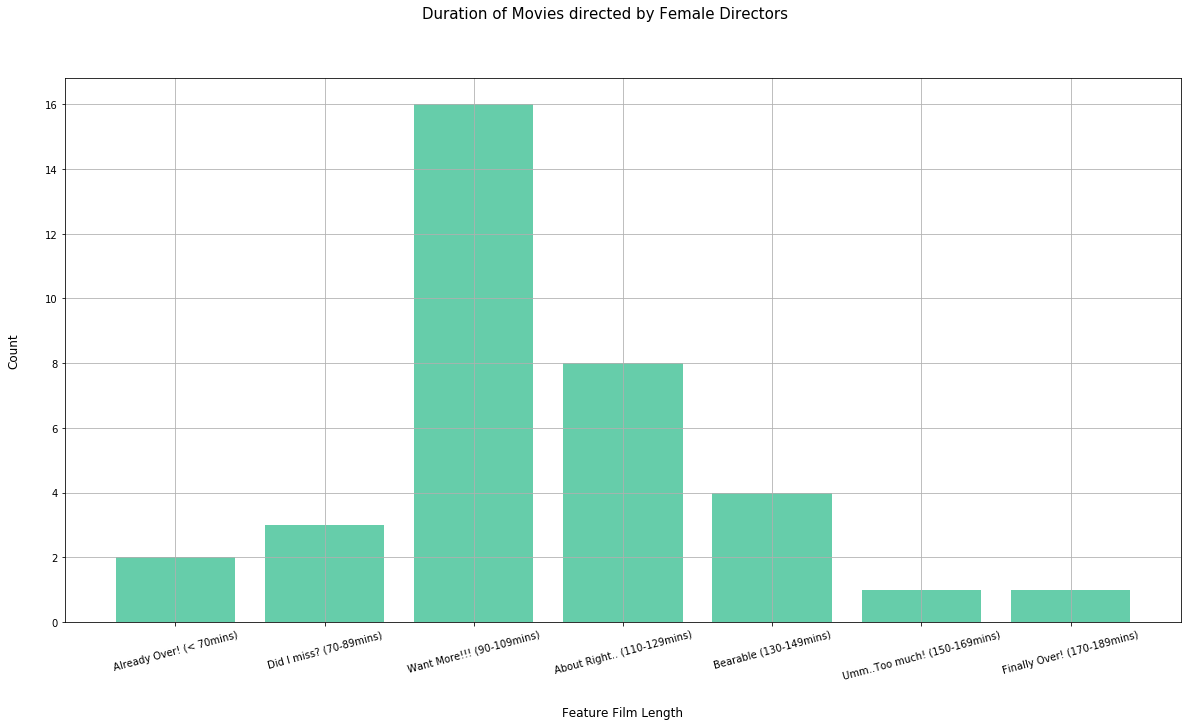

In [106]:
# Plotting the graph (NRB):

plt.figure(figsize = (20,10))

x_axis1 = df7["FeatureFilmLength"]
plt.bar(x_axis1, df7['Count of Movies'] , facecolor="MediumAquaMarine", align="center")

labels= ["Already Over! (< 70mins)","Did I miss? (70-89mins)","Want More!!! (90-109mins)",
         "About Right.. (110-129mins)","Bearable (130-149mins)","Umm..Too much! (150-169mins)",
         "Finally Over! (170-189mins)"]

plt.grid()
plt.yticks(fontsize=10)
plt.xticks(labels, fontsize=10,rotation=15)
plt.xlabel("Feature Film Length",labelpad=25, size=12)

plt.ylabel("Count", labelpad=25, size=12)
plt.suptitle("Duration of Movies directed by Female Directors", size=15)
plt.savefig('figures/Duration of Movies directed by Female Directors')
plt.show()

The above plot is analyzing the count of movies with durations (Feature Length of Films) directed by Female Directors.We see that Female Directors have directed more movies in the Want More category which is of duration from 90 to 109 min. They do not prefer to direct longer duration movies.